In [1]:
INPUT_FOLDER = "../nov26_135_mixtures_early_stop_skip3/"

In [2]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [4]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [5]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(INPUT_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(INPUT_FOLDER+folder)
            else:
                all_models[num_mixtures] = [INPUT_FOLDER+folder]
            
    return all_models
            
print(get_all_models())

{5: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run3', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run5', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run4', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run1'], 1: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run5', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run1', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run3', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run4'], 3: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run1', '../nov26_135_mixtures_ea

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [7]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)            

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Unfinished run. Skipping.
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)           

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

In [8]:
import numpy as np
import os
import random
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']
#1000 entries in each.
#Produces a random start sequence to seed the dreams
def get_random_starting_sequence(minimal_length=100):
    rand_seq_id = random.randint(0,len(observation_data))
    rand_seq = observation_data[rand_seq_id]
    while len(rand_seq) < minimal_length:        
        rand_seq_id = random.randint(0,len(observation_data))
        rand_seq = observation_data[rand_seq_id]
    return observation_data[rand_seq_id], action_data[rand_seq_id]

In [9]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [10]:
def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100, random_actions=True):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    obs_seq, action_seq = get_random_starting_sequence(WARM_UP_STEPS+1)

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(action_seq, obs_seq)
    
    previous_z = obs_seq[WARM_UP_STEPS]
    for i in range(dream_steps):
        current_action=0
        if random_actions:
            action = random.uniform(-1,1)
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(action, previous_z, sigma_temp=0.01)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [11]:
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    plt.figure(figsize=(20,10))
    columns = 4
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[ 0.12741814 -0.15861195  0.0758397  ... -0.26685112  0.19183349
  -0.33552948]
 [ 0.36463135  0.08652367  0.18649828 ...  0.08887508 -0.00417568
  -0.43902442]
 [ 0.54950004  0.09812364  0.15271647 ...  0.32737783 -0.0832807
  -0.43059648]
 ...
 [-0.19734286 -0.96040586 -0.26945618 ...  0.22136078 -0.50036809
  -0.32411046]
 [-0.23117101 -0.93057467 -0.27545713 ...  0.19751378 -0.45797032
  -0.29009019]
 [-0.23318365 -0.9094725  -0.3001931  ...  0.20884378 -0.47767113
  -0.30244183]]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80


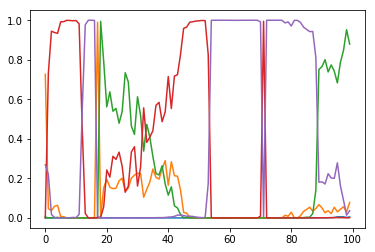

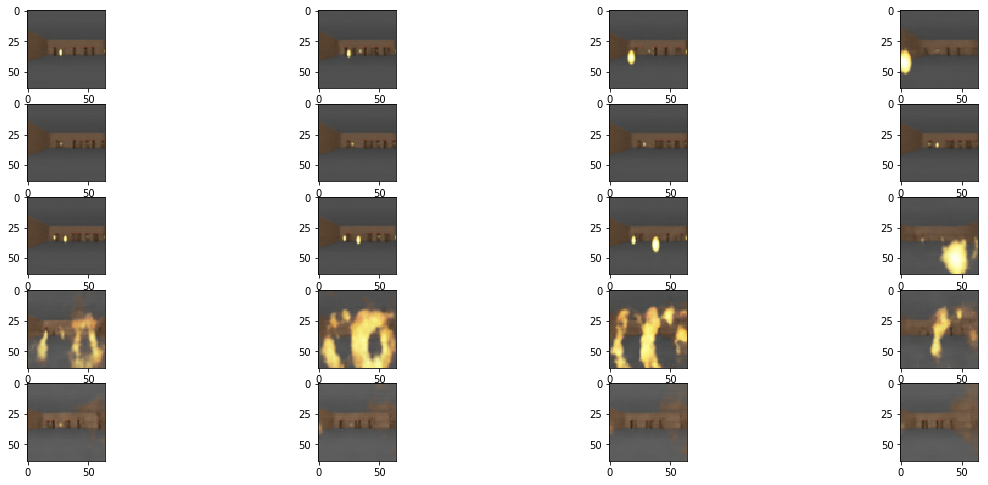

In [12]:
analyzer1= rnn_analyzers[5][2]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)


In [13]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

#This measures how often the same event is captured by the same mixture.
#However, that is not enough: We also need to make sure the handling of the event is
#unique to that mixture. That is, we have to measure if that mixture also handles other events.
def measure_dominating_mixture_for_events(analyzer, num_steps = 100):
    # Measuring the tendency for different events to be modelled by different gaussians
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    dominating_mixture_during_fireball_appear = []
    dominating_mixture_during_fireball_disappear = []
    dominating_mixture_during_monster_appear = []
    dominating_mixture_during_monster_disappear = []
    dominating_mixture_otherwise = []

    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    prev_num_monsters = 0
    prev_num_fireballs = 0
    #When there is an explosion, we cannot usually see the monsters or balls behind.
    #So, we don't count those kinds of appearances/disappearances.
    prev_was_explosion = False
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        num_fireballs, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        num_monsters, _ = count_monsters_and_balls.count_monsters(img)
        
        event_seen = False
        if img_counter != 0 and not is_exploding:
            #Can't measure events in very first image, since events entail some change.
            # Also, during explosions, we cannot properly see events, so we don't count them.
            if num_monsters > prev_num_monsters:
                #Monster appeared.
                dominating_mixture_during_monster_appear.append(dominating_mixture)
                event_seen=True
            if num_monsters < prev_num_monsters:
                dominating_mixture_during_monster_disappear.append(dominating_mixture)
                event_seen = True
            if num_fireballs > prev_num_fireballs:
                dominating_mixture_during_fireball_appear.append(dominating_mixture)
                event_seen = True
            if num_fireballs < prev_num_fireballs:
                dominating_mixture_during_fireball_disappear.append(dominating_mixture)
                event_seen = True     
            if not event_seen:
                dominating_mixture_otherwise.append(dominating_mixture)
                
        if not is_exploding: #During explosions, we do not count objects, since they are hidden.
            prev_num_fireballs = num_fireballs
            prev_num_monsters = num_monsters

    results = {"fireball_appear_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball_appear),
               "fireball_appear_other" : len(dominating_mixture_during_fireball_appear) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball_appear),
               "fireball_disappear_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball_disappear),
               "fireball_disappear_other" : len(dominating_mixture_during_fireball_disappear) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball_disappear),
               "monster_appear_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_monster_appear),
               "monster_appear_other" : len(dominating_mixture_during_monster_appear) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_monster_appear),
               "monster_disappear_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_monster_disappear),
               "monster_disappear_other" : len(dominating_mixture_during_monster_disappear) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_monster_disappear),
               "otherwise_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise),
               "otherwise_other" : len(dominating_mixture_otherwise) - count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise)}
    
    all_events_for_each_mixture = {}
    all_events = [dominating_mixture_during_fireball_appear, dominating_mixture_during_fireball_disappear,
                 dominating_mixture_during_monster_appear, dominating_mixture_during_monster_disappear,
                 dominating_mixture_otherwise]
    
    event_counter = 0
    for event in all_events:
        for mixture in event:
            if mixture in all_events_for_each_mixture.keys():
                all_events_for_each_mixture[mixture].append(event_counter)
            else:
                all_events_for_each_mixture[mixture] = [event_counter]
        event_counter +=1
        
    main_mixture_for_fireball_appear = name_most_common_element_in_array(dominating_mixture_during_fireball_appear)
    main_mixture_for_fireball_disappear = name_most_common_element_in_array(dominating_mixture_during_fireball_appear)
    main_mixture_for_monster_appear = name_most_common_element_in_array(dominating_mixture_during_monster_appear)
    main_mixture_for_monster_disappear = name_most_common_element_in_array(dominating_mixture_during_monster_disappear)
    main_mixture_otherwise = name_most_common_element_in_array(dominating_mixture_otherwise)
    main_mixtures_for_events = {"fireball_appear" : main_mixture_for_fireball_appear,
                               "fireball_disappear" : main_mixture_for_fireball_disappear,
                               "monster_appear" : main_mixture_for_monster_appear,
                               "monster_disappear" : main_mixture_for_monster_disappear,
                               "otherwise" : main_mixture_otherwise}
    
    
    return results, all_events_for_each_mixture, main_mixtures_for_events
               

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from

5
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 14), (3, 12), (1, 10), (4, 9), (0, 7)]
[(2, 14), (3, 12), (1, 10), (4, 9), (0, 7)]
[(3, 21), (2, 15), (1, 12), (0, 3), (4, 2)]
[(3, 21), (2, 15), (1, 12), (0, 3), (4, 2)]
[(1, 92), (3, 38), (2, 28), (0, 14), (4, 12)]
[(1, 92), (3, 38), (2, 28), (0, 

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 23), (0, 18), (2, 16), (1, 14), (3, 6)]
[(4, 23), (0, 18), (2, 16), (1, 14), (3, 6)]
[(1, 26), (4, 16), (2, 15), (0, 11), (3, 9)]
[(1, 26), (4, 16), (2, 15), (0, 11), (3, 9)]
[(0, 93), (2, 47), (4, 42), (1, 35), (3, 17)]
[(0, 93), (2, 47), (4, 42), (1

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 36), (3, 23), (4, 21), (1, 5), (0, 1)]
[(2, 36), (3, 23), (4, 21), (1, 5), (0, 1)]
[(4, 29), (2, 28), (3, 25), (1, 7), (0, 1)]
[(4, 29), (2, 28), (3, 25), (1, 7), (0, 1)]
[(2, 117), (3, 46), (4, 44), (1, 7), (0, 7)]
[(2, 117), (3, 46), (4, 44), (1, 7)

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 31), (0, 6), (2, 3), (3, 1)]
[(1, 31), (0, 6), (2, 3), (3, 1)]
[(1, 31), (0, 9), (4, 1), (3, 1)]
[(1, 31), (0, 9), (4, 1), (3, 1)]
[(1, 171), (0, 23), (3, 6), (2, 6), (4, 1)]
[(1, 171), (0, 23), (3, 6), (2, 6), (4, 1)]
[(1, 166), (0, 18), (3, 9), (2, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 70), (4, 57), (3, 36), (1, 15), (2, 12)]
[(0, 70), (4, 57), (3, 36), (1, 15), (2, 12)]
[(0, 74), (4, 58), (3, 25), (2, 17), (1, 13)]
[(0, 74), (4, 58), (3, 25), (2, 17), (1, 13)]
[(0, 71), (4, 56), (1, 55), (2, 39), (3, 33)]
[(0, 71), (4, 56), (1, 55)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 17), (2, 16), (3, 7), (4, 4), (0, 4)]
[(1, 17), (2, 16), (3, 7), (4, 4), (0, 4)]
[(2, 20), (3, 16), (1, 14), (4, 2), (0, 1)]
[(2, 20), (3, 16), (1, 14), (4, 2), (0, 1)]
[(1, 134), (2, 31), (3, 29), (0, 9), (4, 7)]
[(1, 134), (2, 31), (3, 29), (0, 9), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 127), (1, 50), (0, 44), (2, 7), (3, 3)]
[(4, 127), (1, 50), (0, 44), (2, 7), (3, 3)]
[(4, 139), (0, 49), (1, 47), (2, 7), (3, 5)]
[(4, 139), (0, 49), (1, 47), (2, 7), (3, 5)]
[(4, 98), (0, 59), (1, 38), (2, 23), (3, 5)]
[(4, 98), (0, 59), (1, 38), (2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 33), (3, 23), (1, 22), (2, 21), (0, 5)]
[(4, 33), (3, 23), (1, 22), (2, 21), (0, 5)]
[(4, 32), (1, 31), (3, 19), (2, 13), (0, 7)]
[(4, 32), (1, 31), (3, 19), (2, 13), (0, 7)]
[(2, 79), (4, 54), (3, 52), (1, 37), (0, 19)]
[(2, 79), (4, 54), (3, 52), (1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 34), (1, 16), (4, 3), (3, 3), (2, 2)]
[(0, 34), (1, 16), (4, 3), (3, 3), (2, 2)]
[(0, 34), (1, 15), (2, 5), (4, 5)]
[(0, 34), (1, 15), (2, 5), (4, 5)]
[(1, 100), (0, 31), (3, 7), (2, 6), (4, 3)]
[(1, 100), (0, 31), (3, 7), (2, 6), (4, 3)]
[(1, 93), (0

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 95), (0, 50), (3, 41), (2, 9), (1, 5)]
[(4, 95), (0, 50), (3, 41), (2, 9), (1, 5)]
[(4, 103), (0, 61), (3, 22), (2, 13), (1, 6)]
[(4, 103), (0, 61), (3, 22), (2, 13), (1, 6)]
[(4, 88), (1, 48), (0, 39), (3, 30), (2, 17)]
[(4, 88), (1, 48), (0, 39), (3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 26), (2, 22), (1, 22), (0, 7), (4, 6)]
[(3, 26), (2, 22), (1, 22), (0, 7), (4, 6)]
[(3, 28), (2, 26), (1, 22), (4, 6), (0, 3)]
[(3, 28), (2, 26), (1, 22), (4, 6), (0, 3)]
[(1, 93), (3, 52), (2, 41), (0, 14), (4, 13)]
[(1, 93), (3, 52), (2, 41), (0, 14

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 59), (4, 55), (1, 35), (2, 11), (3, 7)]
[(0, 59), (4, 55), (1, 35), (2, 11), (3, 7)]
[(4, 59), (0, 47), (1, 36), (2, 12), (3, 6)]
[(4, 59), (0, 47), (1, 36), (2, 12), (3, 6)]
[(0, 88), (4, 66), (1, 44), (2, 14), (3, 11)]
[(0, 88), (4, 66), (1, 44), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 27), (3, 21), (2, 12), (1, 5), (0, 2)]
[(4, 27), (3, 21), (2, 12), (1, 5), (0, 2)]
[(4, 36), (3, 14), (1, 11), (2, 4), (0, 2)]
[(4, 36), (3, 14), (1, 11), (2, 4), (0, 2)]
[(2, 88), (4, 59), (3, 31), (1, 16), (0, 8)]
[(2, 88), (4, 59), (3, 31), (1, 16)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 35), (1, 20), (4, 13), (3, 5), (2, 2)]
[(0, 35), (1, 20), (4, 13), (3, 5), (2, 2)]
[(0, 40), (4, 14), (1, 12), (3, 6), (2, 5)]
[(0, 40), (4, 14), (1, 12), (3, 6), (2, 5)]
[(1, 93), (0, 46), (4, 24), (3, 19), (2, 5)]
[(1, 93), (0, 46), (4, 24), (3, 19)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 64), (4, 62), (2, 18), (1, 17), (3, 10)]
[(0, 64), (4, 62), (2, 18), (1, 17), (3, 10)]
[(4, 70), (0, 47), (2, 32), (1, 11), (3, 11)]
[(4, 70), (0, 47), (2, 32), (1, 11), (3, 11)]
[(1, 75), (0, 65), (4, 59), (2, 50), (3, 10)]
[(1, 75), (0, 65), (4, 59)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 27), (2, 17), (3, 8), (0, 5), (4, 5)]
[(1, 27), (2, 17), (3, 8), (0, 5), (4, 5)]
[(2, 25), (1, 15), (3, 12), (4, 8), (0, 4)]
[(2, 25), (1, 15), (3, 12), (4, 8), (0, 4)]
[(1, 115), (2, 44), (3, 32), (4, 15), (0, 10)]
[(1, 115), (2, 44), (3, 32), (4, 15

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 50), (0, 50), (1, 41), (2, 4), (3, 2)]
[(4, 50), (0, 50), (1, 41), (2, 4), (3, 2)]
[(4, 57), (0, 44), (1, 41), (2, 6), (3, 4)]
[(4, 57), (0, 44), (1, 41), (2, 6), (3, 4)]
[(0, 101), (1, 95), (4, 32), (2, 16), (3, 1)]
[(0, 101), (1, 95), (4, 32), (2, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 21), (2, 18), (4, 10), (1, 4), (0, 1)]
[(3, 21), (2, 18), (4, 10), (1, 4), (0, 1)]
[(3, 16), (4, 15), (2, 12), (0, 7), (1, 3)]
[(3, 16), (4, 15), (2, 12), (0, 7), (1, 3)]
[(2, 82), (3, 38), (4, 27), (1, 7), (0, 6)]
[(2, 82), (3, 38), (4, 27), (1, 7), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 16), (0, 11), (4, 4), (2, 1)]
[(1, 16), (0, 11), (4, 4), (2, 1)]
[(1, 17), (4, 7), (0, 6), (2, 1)]
[(1, 17), (4, 7), (0, 6), (2, 1)]
[(1, 147), (0, 27), (4, 20), (3, 7), (2, 1)]
[(1, 147), (0, 27), (4, 20), (3, 7), (2, 1)]
[(1, 134), (0, 32), (4, 16),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 46), (1, 35), (4, 32), (2, 10), (3, 9)]
[(0, 46), (1, 35), (4, 32), (2, 10), (3, 9)]
[(4, 39), (0, 39), (1, 22), (2, 17), (3, 11)]
[(4, 39), (0, 39), (1, 22), (2, 17), (3, 11)]
[(1, 92), (0, 56), (4, 40), (2, 34), (3, 11)]
[(1, 92), (0, 56), (4, 40), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 27), (3, 15), (2, 4), (0, 4), (4, 2)]
[(1, 27), (3, 15), (2, 4), (0, 4), (4, 2)]
[(1, 24), (3, 14), (4, 6), (0, 6), (2, 5)]
[(1, 24), (3, 14), (4, 6), (0, 6), (2, 5)]
[(1, 166), (3, 31), (0, 9), (4, 8), (2, 5)]
[(1, 166), (3, 31), (0, 9), (4, 8), (2, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 38), (1, 21), (4, 9), (2, 4), (3, 3)]
[(0, 38), (1, 21), (4, 9), (2, 4), (3, 3)]
[(0, 30), (1, 28), (4, 12), (2, 3), (3, 1)]
[(0, 30), (1, 28), (4, 12), (2, 3), (3, 1)]
[(0, 136), (1, 45), (4, 17), (3, 15), (2, 9)]
[(0, 136), (1, 45), (4, 17), (3, 15)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 14), (3, 12), (2, 11), (1, 5)]
[(4, 14), (3, 12), (2, 11), (1, 5)]
[(4, 12), (3, 10), (2, 9), (1, 4), (0, 4)]
[(4, 12), (3, 10), (2, 9), (1, 4), (0, 4)]
[(2, 116), (3, 45), (4, 24), (1, 11), (0, 4)]
[(2, 116), (3, 45), (4, 24), (1, 11), (0, 4)]
[(2, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 19), (1, 17), (0, 12), (2, 5), (3, 2)]
[(4, 19), (1, 17), (0, 12), (2, 5), (3, 2)]
[(0, 24), (1, 14), (4, 12), (2, 6), (3, 2)]
[(0, 24), (1, 14), (4, 12), (2, 6), (3, 2)]
[(1, 112), (0, 40), (4, 34), (3, 7), (2, 5)]
[(1, 112), (0, 40), (4, 34), (3, 7)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 34), (0, 25), (1, 13), (3, 13), (2, 4)]
[(4, 34), (0, 25), (1, 13), (3, 13), (2, 4)]
[(4, 39), (0, 27), (3, 10), (1, 9), (2, 9)]
[(4, 39), (0, 27), (3, 10), (1, 9), (2, 9)]
[(1, 119), (0, 37), (4, 35), (2, 35), (3, 21)]
[(1, 119), (0, 37), (4, 35), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 33), (3, 17), (2, 12), (0, 6), (4, 4)]
[(1, 33), (3, 17), (2, 12), (0, 6), (4, 4)]
[(1, 34), (2, 17), (3, 15), (4, 7), (0, 2)]
[(1, 34), (2, 17), (3, 15), (4, 7), (0, 2)]
[(1, 110), (3, 37), (2, 33), (0, 13), (4, 9)]
[(1, 110), (3, 37), (2, 33), (0, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 11), (4, 6), (3, 4), (2, 4), (1, 2)]
[(0, 11), (4, 6), (3, 4), (2, 4), (1, 2)]
[(0, 13), (4, 7), (1, 7), (3, 1), (2, 1)]
[(0, 13), (4, 7), (1, 7), (3, 1), (2, 1)]
[(0, 153), (4, 22), (1, 21), (3, 21), (2, 13)]
[(0, 153), (4, 22), (1, 21), (3, 21), (2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 46), (4, 39), (2, 24), (1, 8), (0, 1)]
[(3, 46), (4, 39), (2, 24), (1, 8), (0, 1)]
[(4, 53), (3, 38), (2, 22), (1, 8), (0, 1)]
[(4, 53), (3, 38), (2, 22), (1, 8), (0, 1)]
[(3, 72), (4, 51), (2, 49), (1, 16), (0, 1)]
[(3, 72), (4, 51), (2, 49), (1, 16)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 18), (1, 18), (0, 16), (2, 1)]
[(4, 18), (1, 18), (0, 16), (2, 1)]
[(4, 21), (0, 18), (1, 9), (2, 4), (3, 1)]
[(4, 21), (0, 18), (1, 9), (2, 4), (3, 1)]
[(1, 124), (0, 46), (4, 31), (2, 4), (3, 2)]
[(1, 124), (0, 46), (4, 31), (2, 4), (3, 2)]
[(1, 125

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 22), (2, 8), (4, 6), (0, 4), (3, 2)]
[(1, 22), (2, 8), (4, 6), (0, 4), (3, 2)]
[(2, 15), (1, 13), (4, 8), (0, 4), (3, 2)]
[(2, 15), (1, 13), (4, 8), (0, 4), (3, 2)]
[(1, 128), (2, 41), (0, 17), (4, 10), (3, 7)]
[(1, 128), (2, 41), (0, 17), (4, 10), (3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 27), (2, 10), (3, 7), (0, 5), (4, 3)]
[(1, 27), (2, 10), (3, 7), (0, 5), (4, 3)]
[(1, 24), (3, 14), (2, 12), (0, 3), (4, 1)]
[(1, 24), (3, 14), (2, 12), (0, 3), (4, 1)]
[(1, 121), (3, 33), (2, 28), (0, 13), (4, 12)]
[(1, 121), (3, 33), (2, 28), (0, 13

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 30), (0, 28), (1, 25), (2, 5), (3, 3)]
[(4, 30), (0, 28), (1, 25), (2, 5), (3, 3)]
[(4, 40), (1, 26), (0, 24), (2, 8), (3, 2)]
[(4, 40), (1, 26), (0, 24), (2, 8), (3, 2)]
[(0, 108), (1, 38), (4, 31), (3, 18), (2, 8)]
[(0, 108), (1, 38), (4, 31), (3, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 69), (4, 28), (3, 12), (1, 12)]
[(2, 69), (4, 28), (3, 12), (1, 12)]
[(2, 76), (4, 30), (3, 13), (1, 12)]
[(2, 76), (4, 30), (3, 13), (1, 12)]
[(2, 124), (4, 41), (3, 22), (1, 15)]
[(2, 124), (4, 41), (3, 22), (1, 15)]
[(2, 127), (4, 39), (3, 21), (1,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 20), (4, 16), (0, 6), (3, 5), (2, 1)]
[(1, 20), (4, 16), (0, 6), (3, 5), (2, 1)]
[(1, 18), (4, 13), (0, 11), (3, 3), (2, 1)]
[(1, 18), (4, 13), (0, 11), (3, 3), (2, 1)]
[(1, 156), (0, 40), (4, 16), (3, 13), (2, 3)]
[(1, 156), (0, 40), (4, 16), (3, 13)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(4, 51), (0, 43), (3, 19), (1, 18), (2, 7)]
[(4, 51), (0, 43), (3, 19), (1, 18), (2, 7)]
[(4, 63), (0, 41), (1, 17), (3, 12), (2, 7)]
[(4, 63), (0, 41), (1, 17), (3, 12), (2, 7)]
[(1, 83), (4, 68), (0, 37), (3, 30), (2, 16)]
[(1, 83), (4, 68), (0, 37), (3

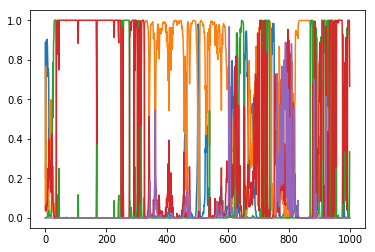

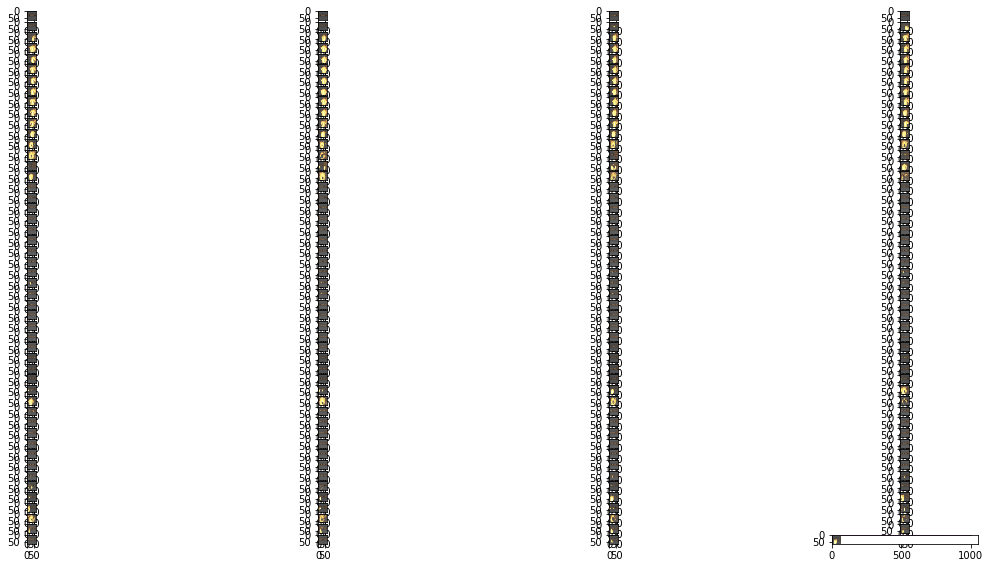

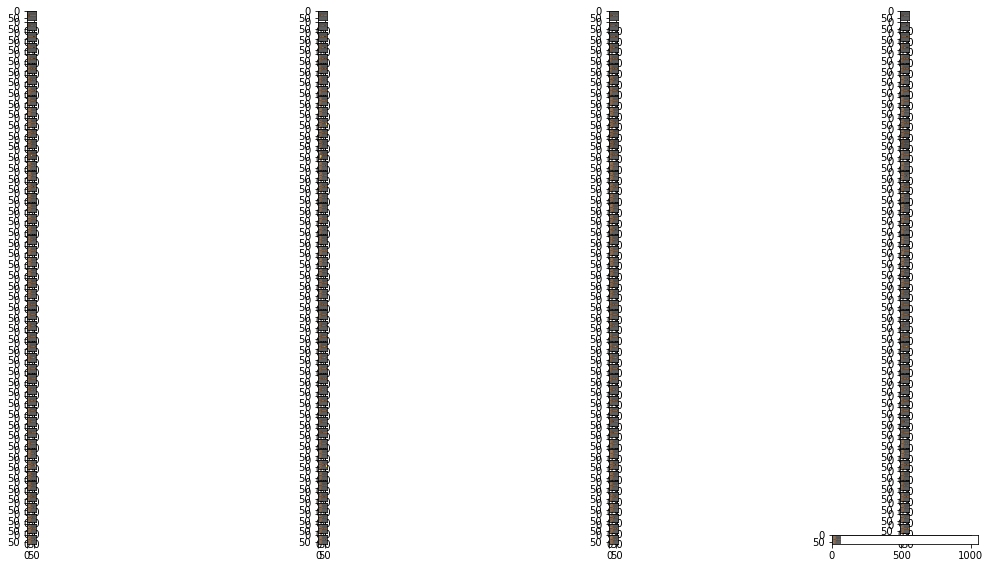

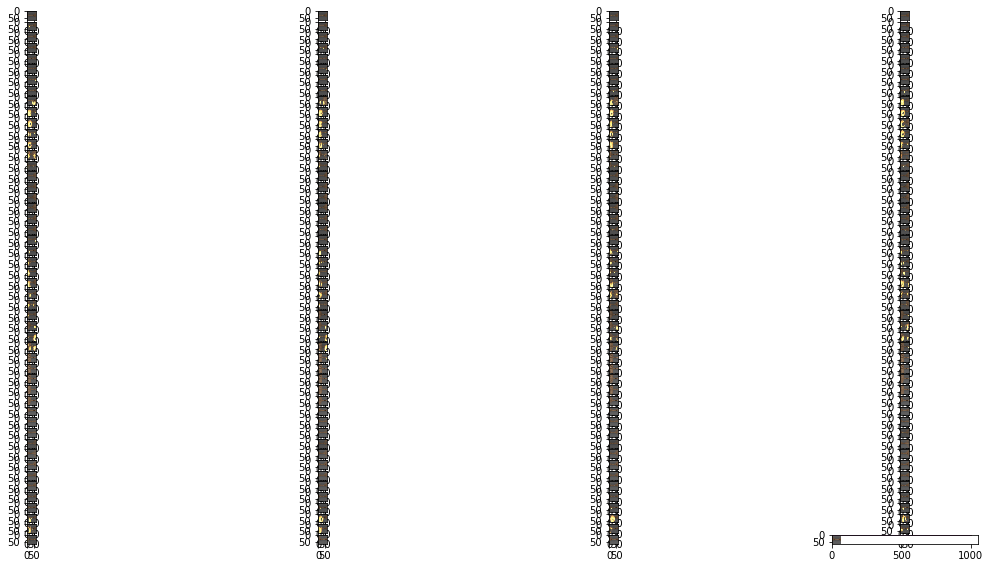

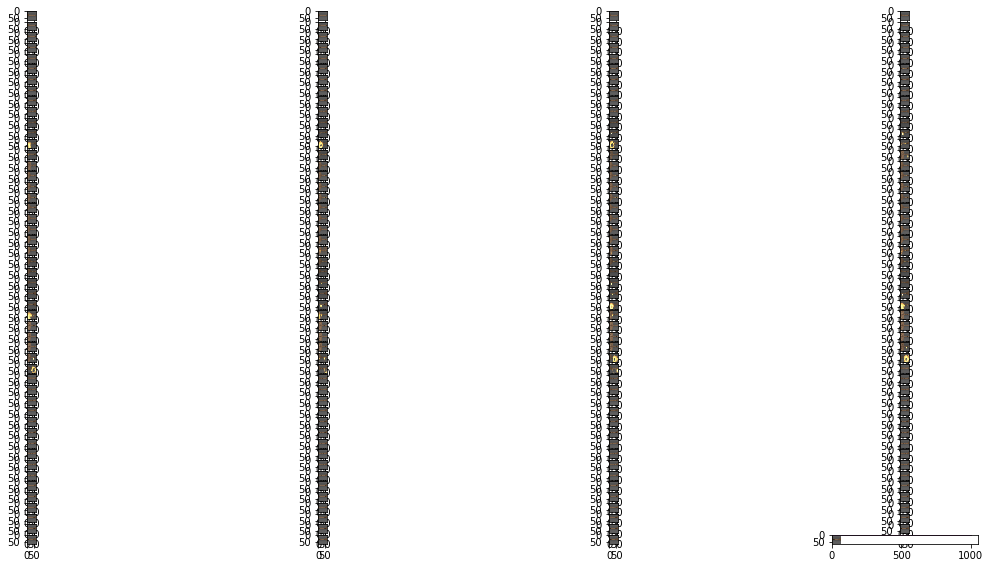

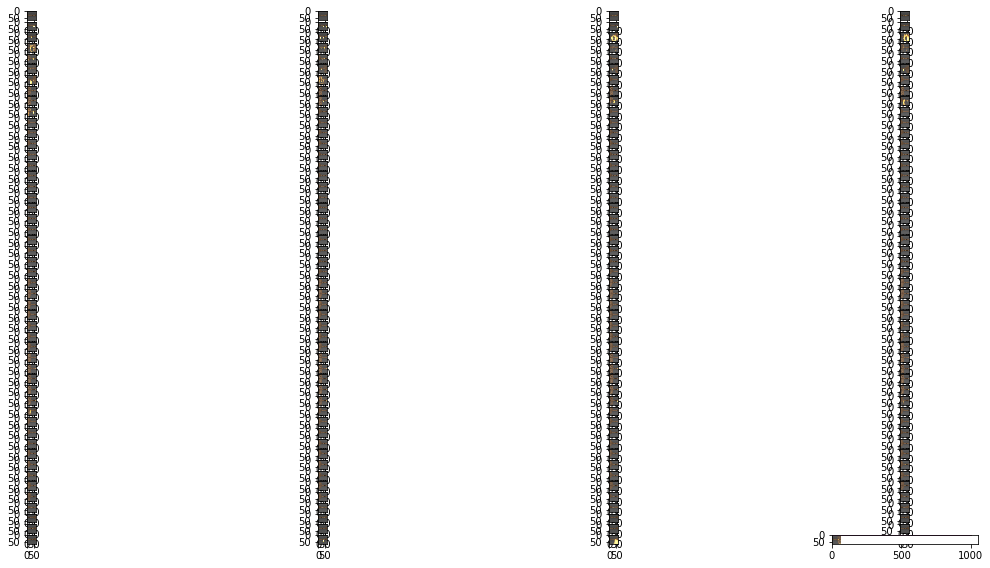

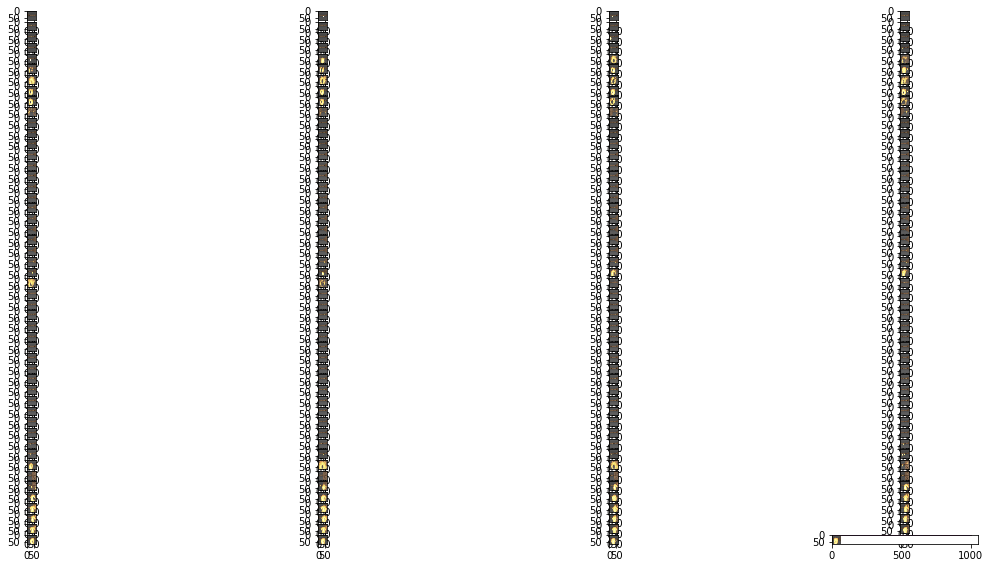

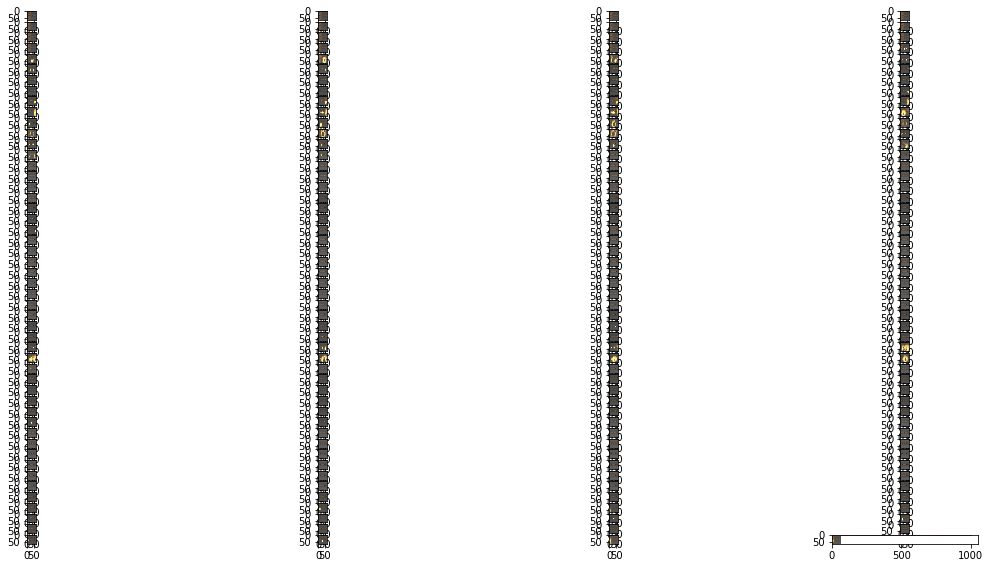

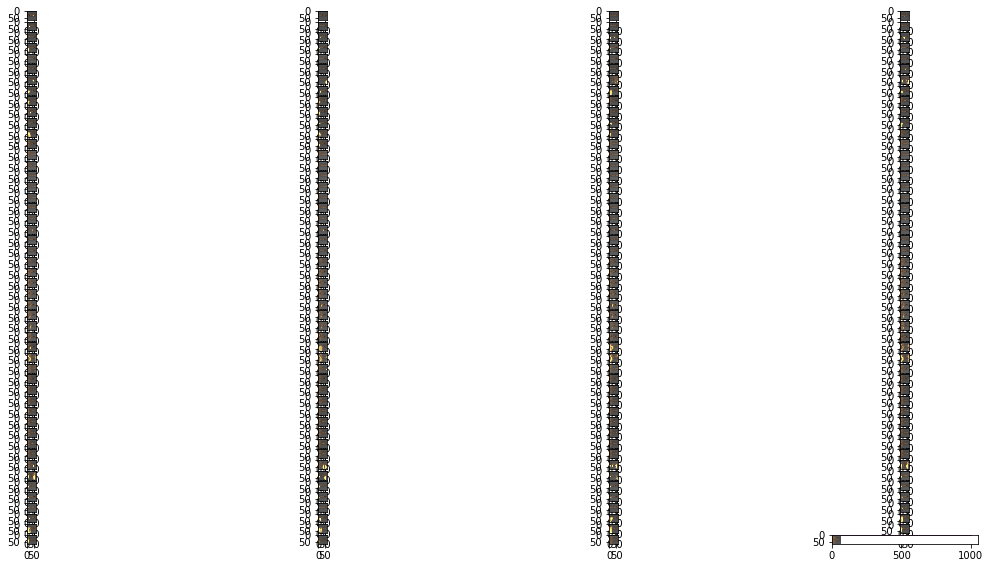

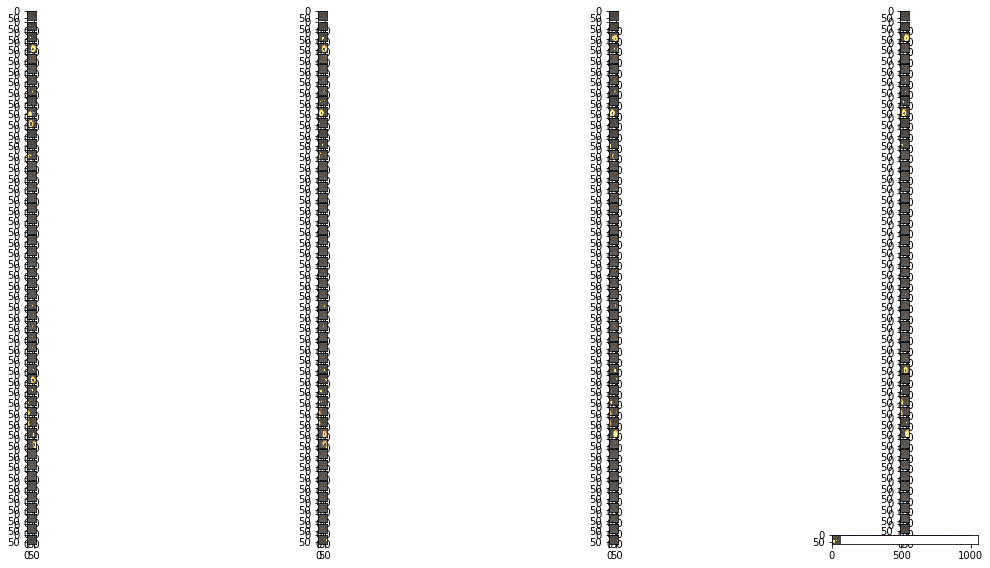

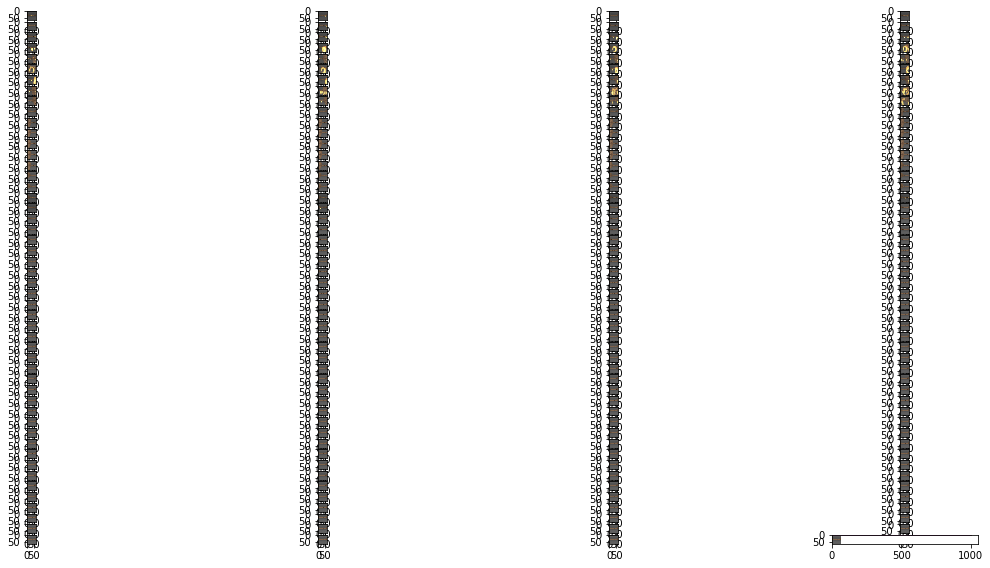

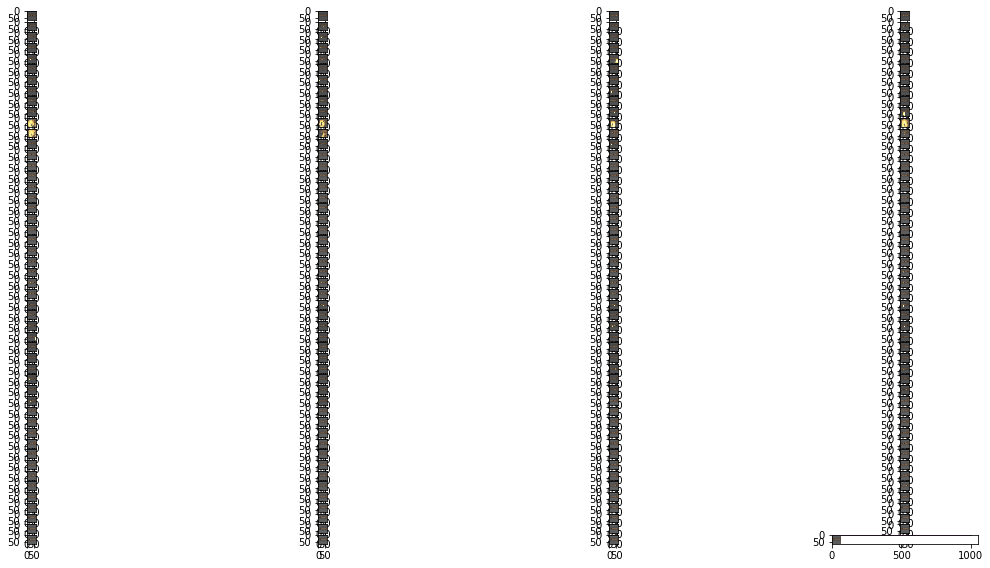

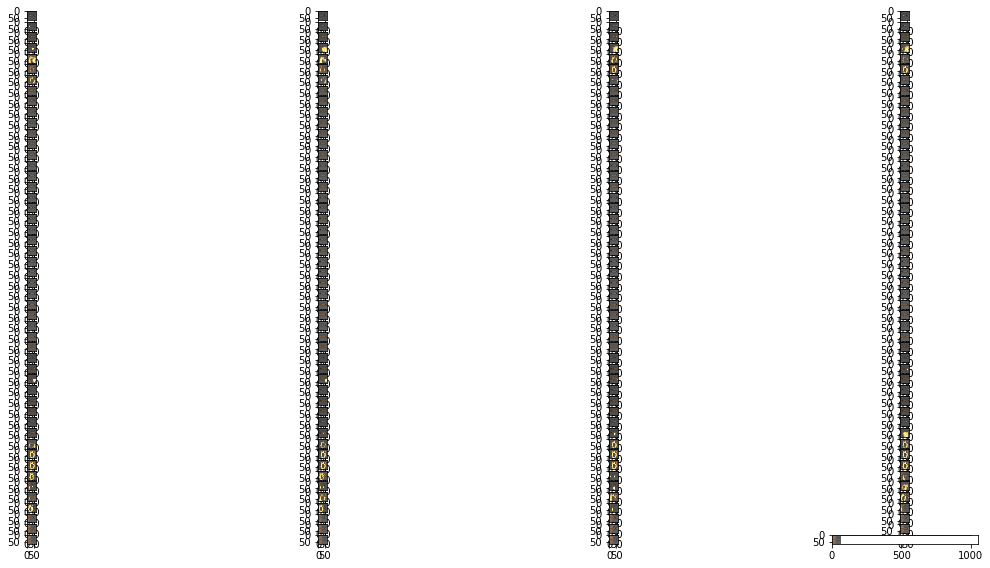

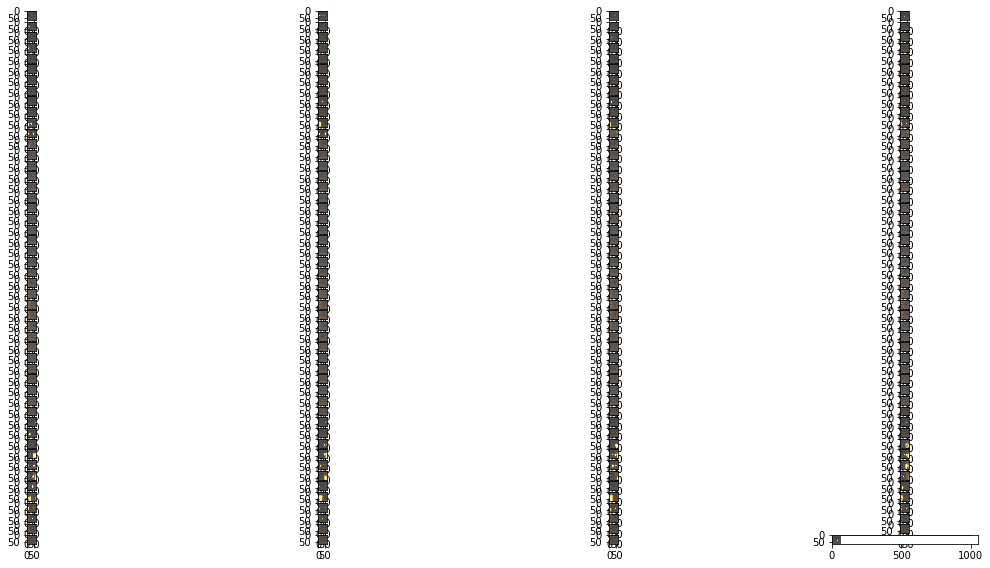

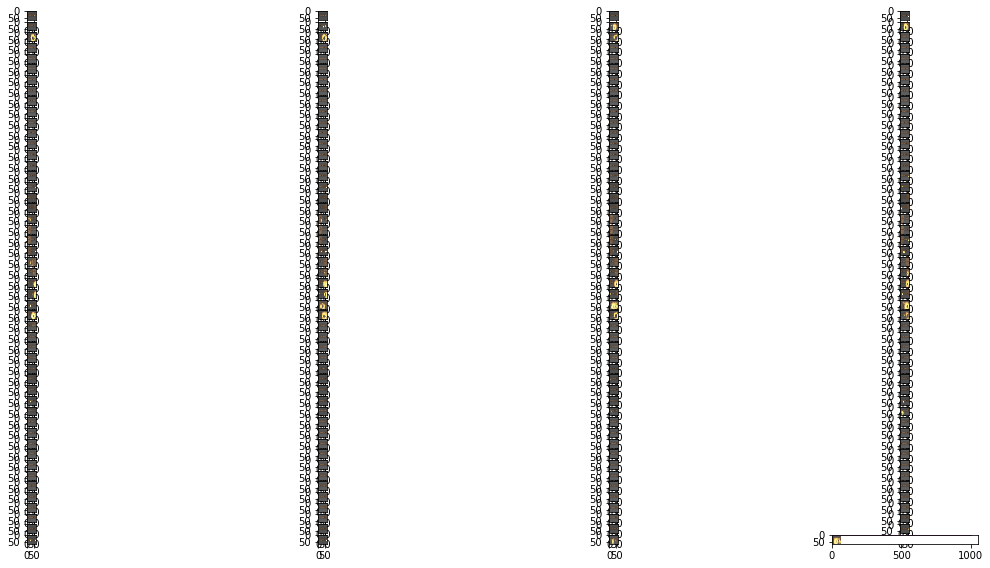

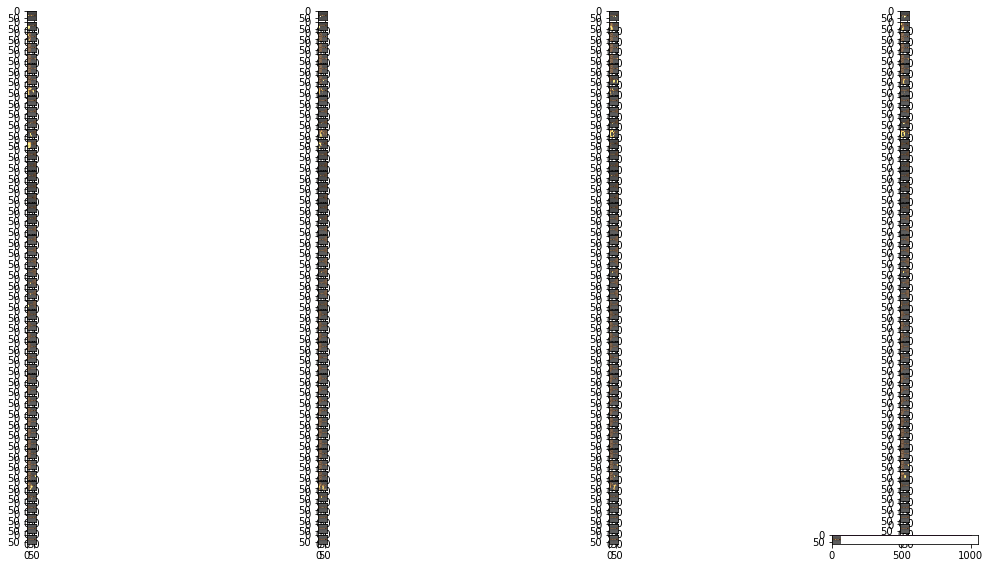

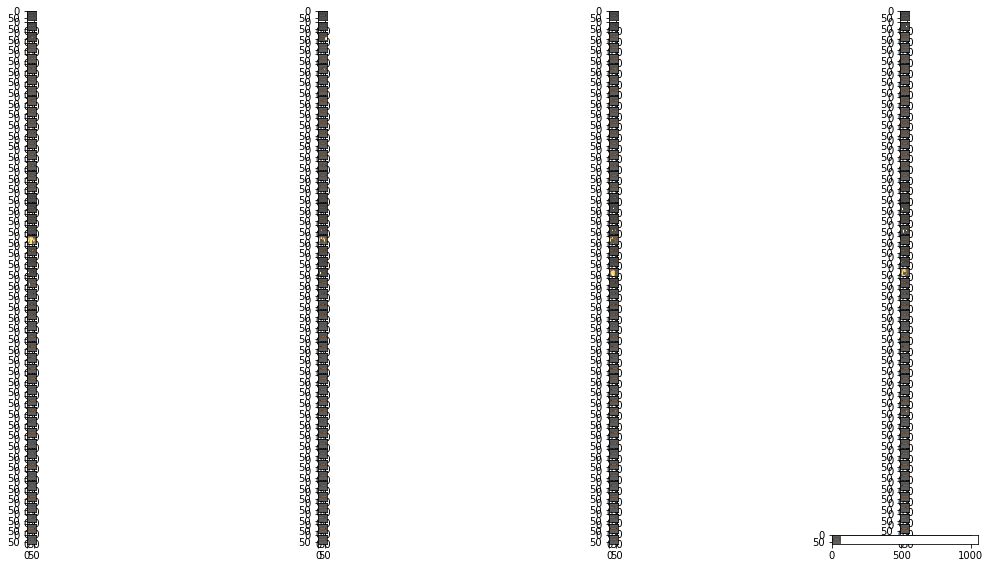

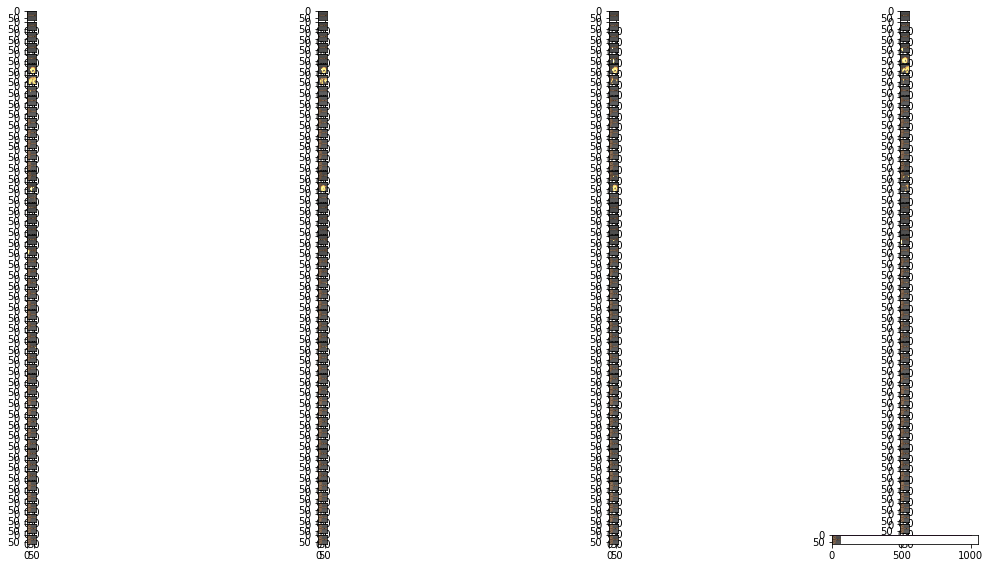

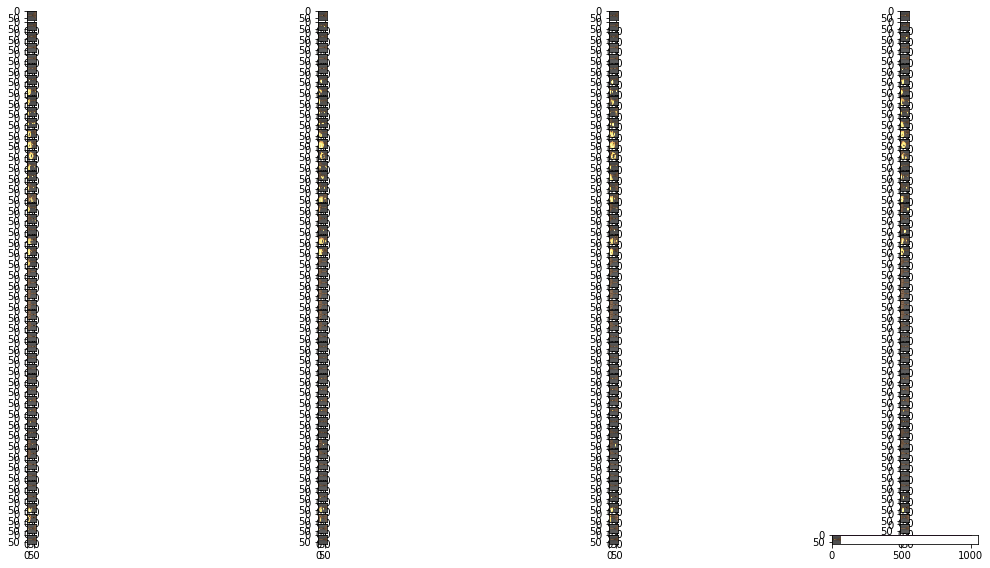

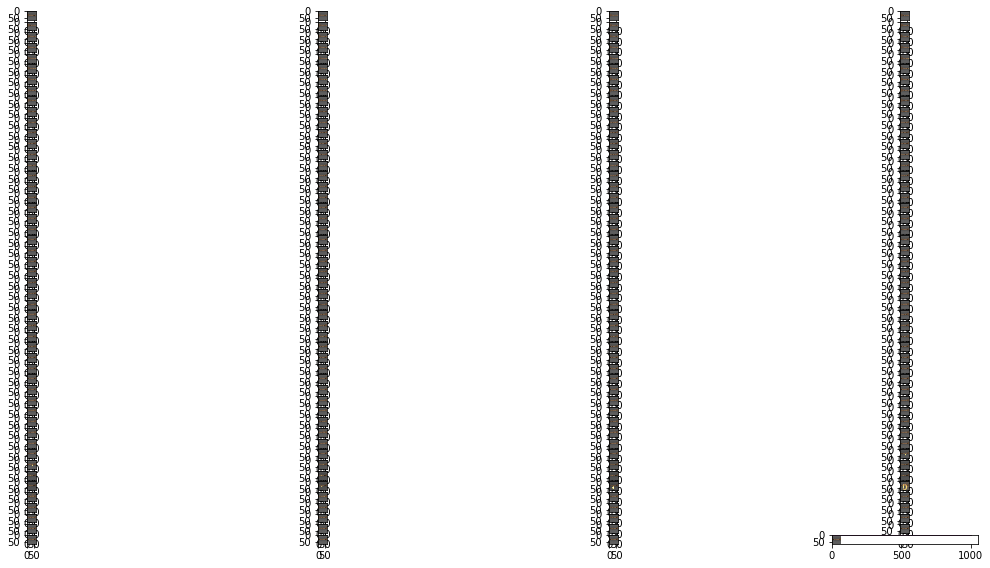

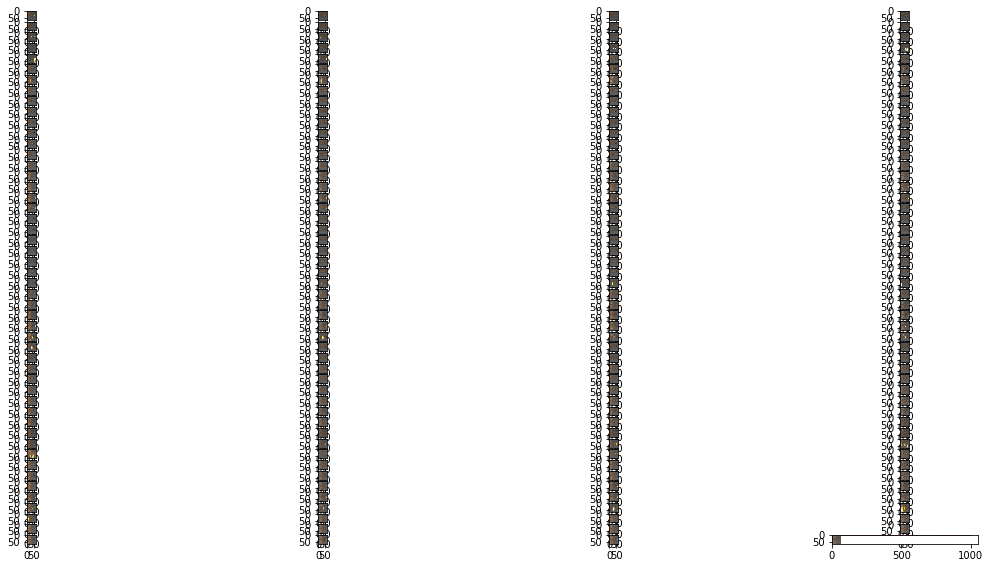

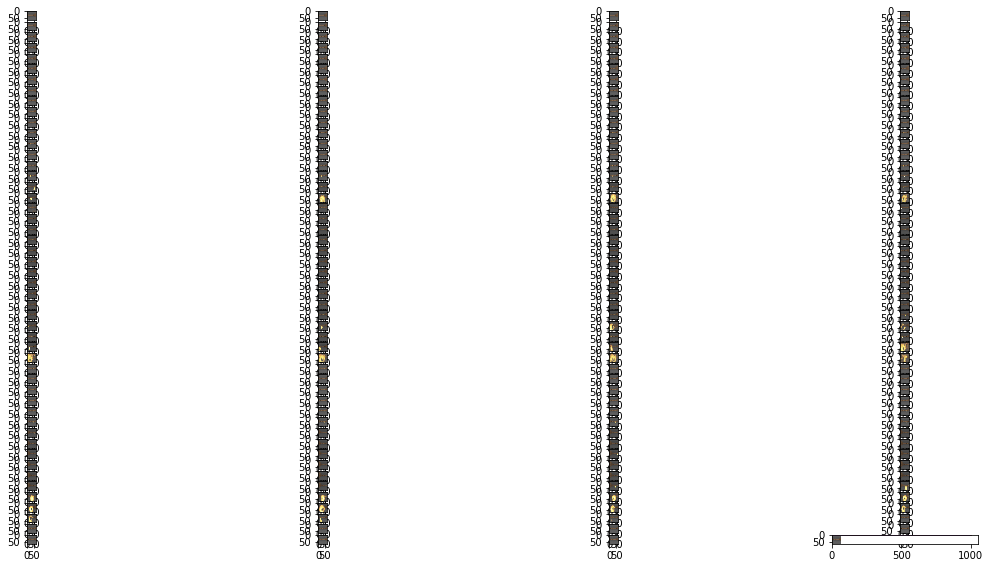

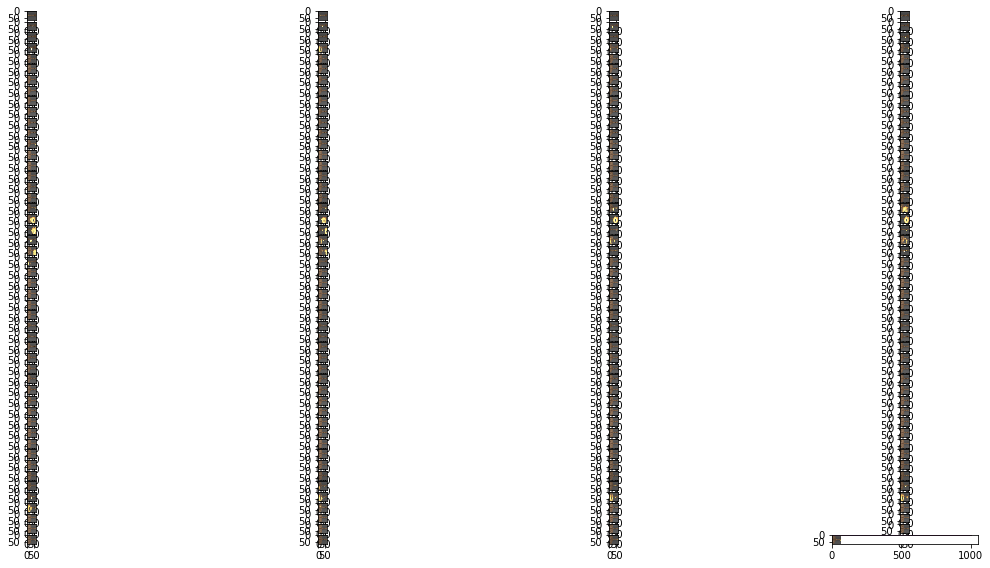

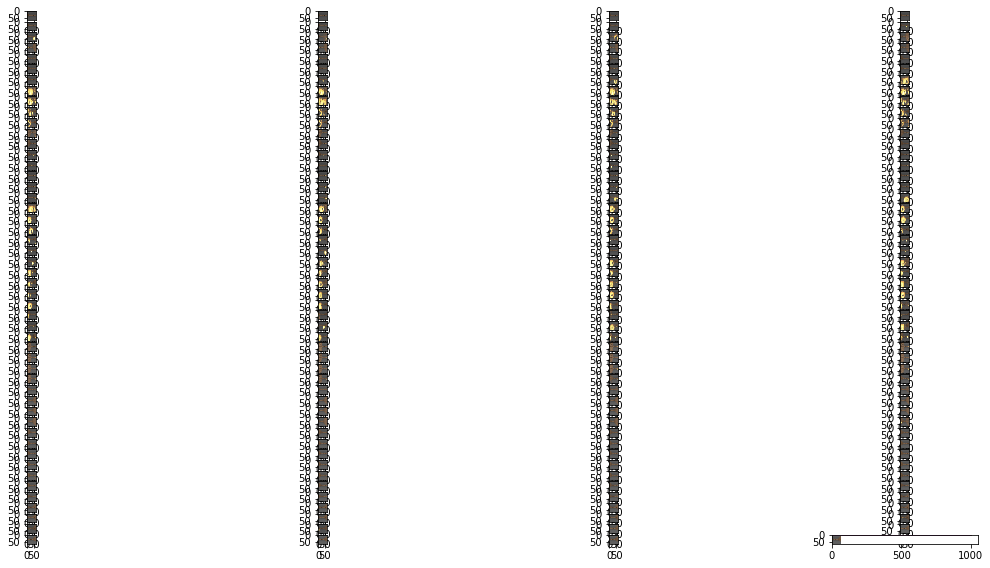

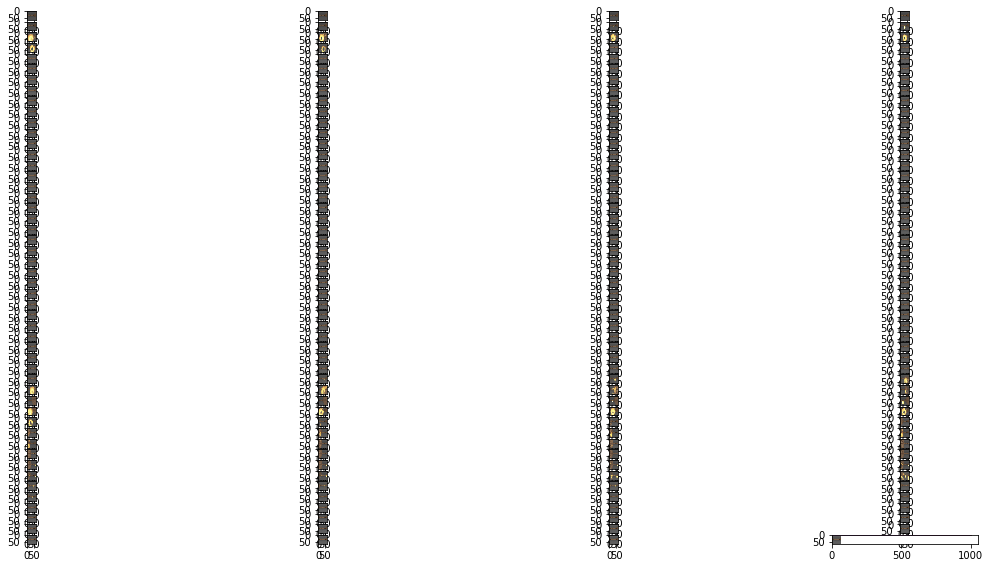

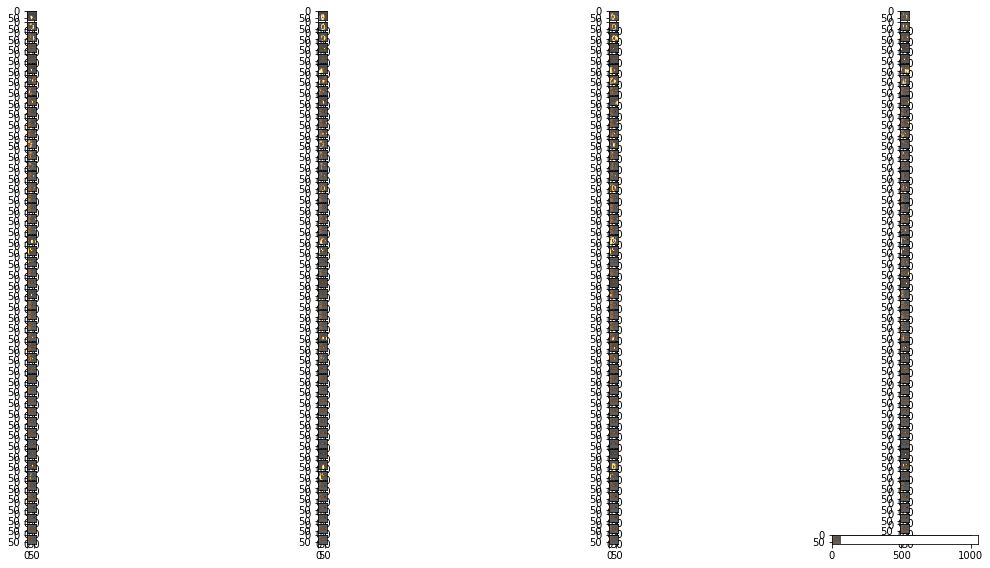

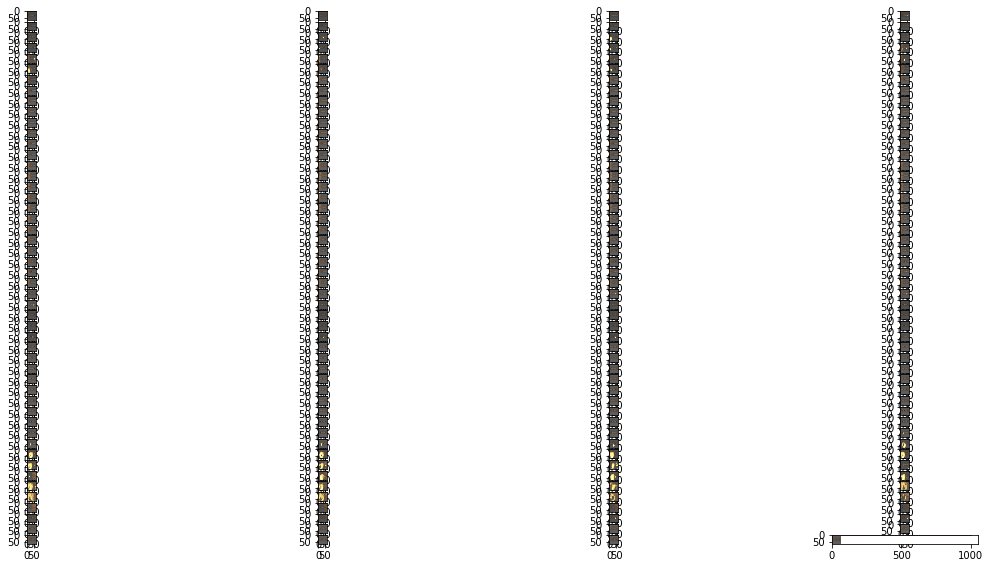

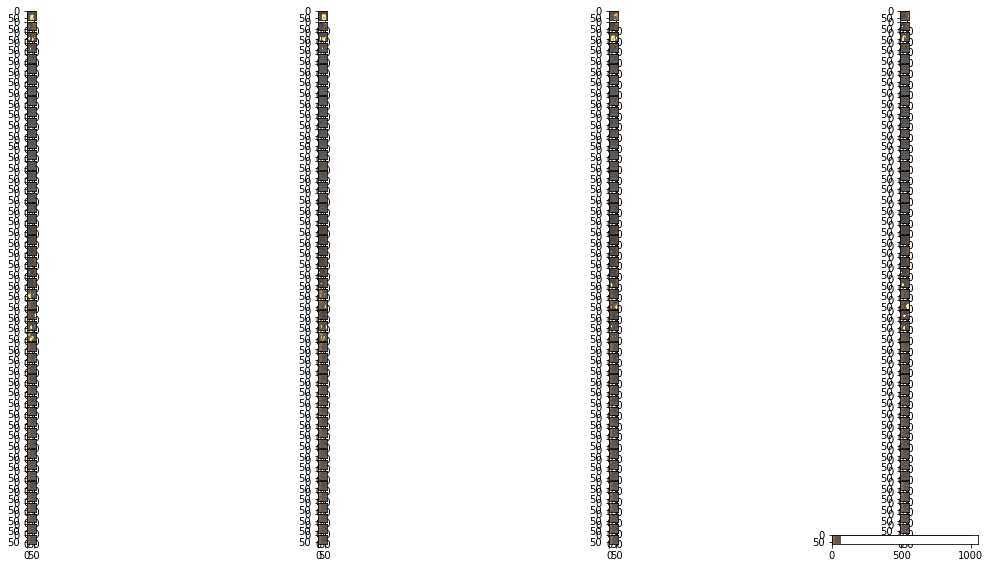

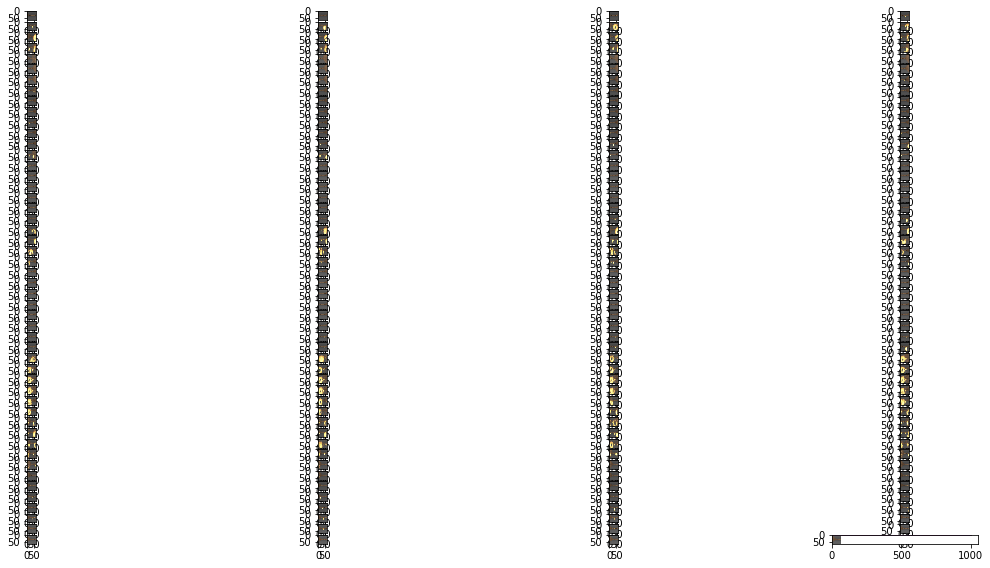

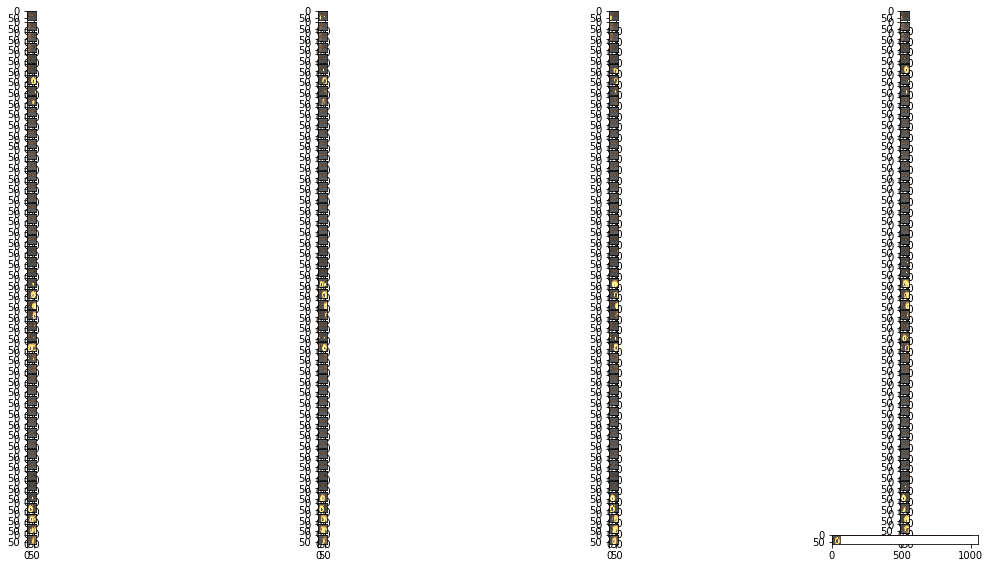

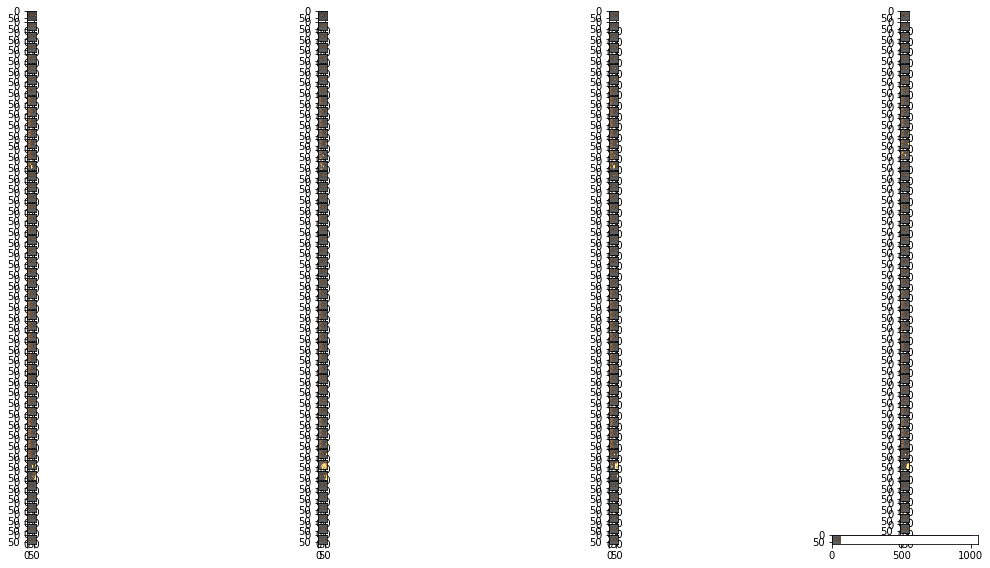

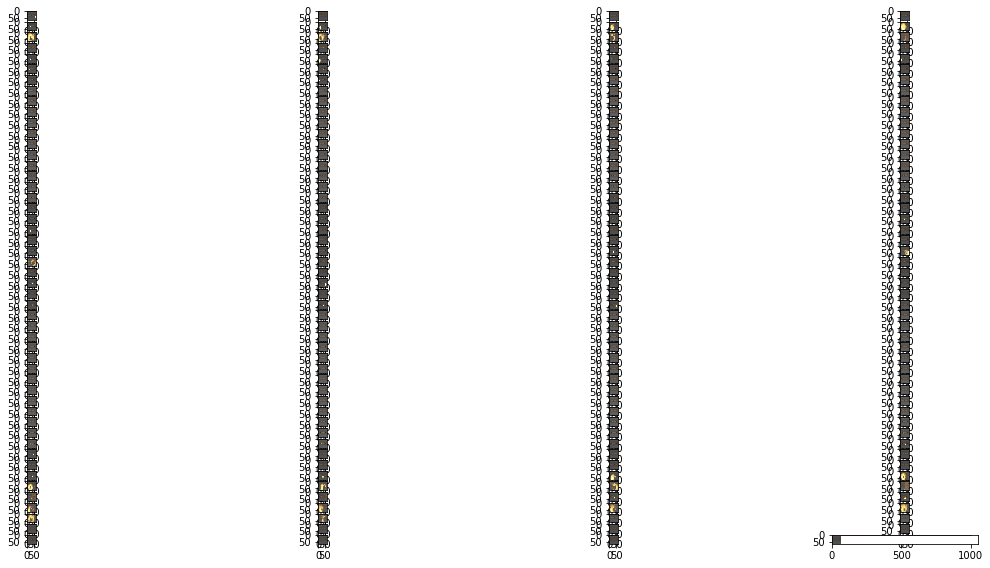

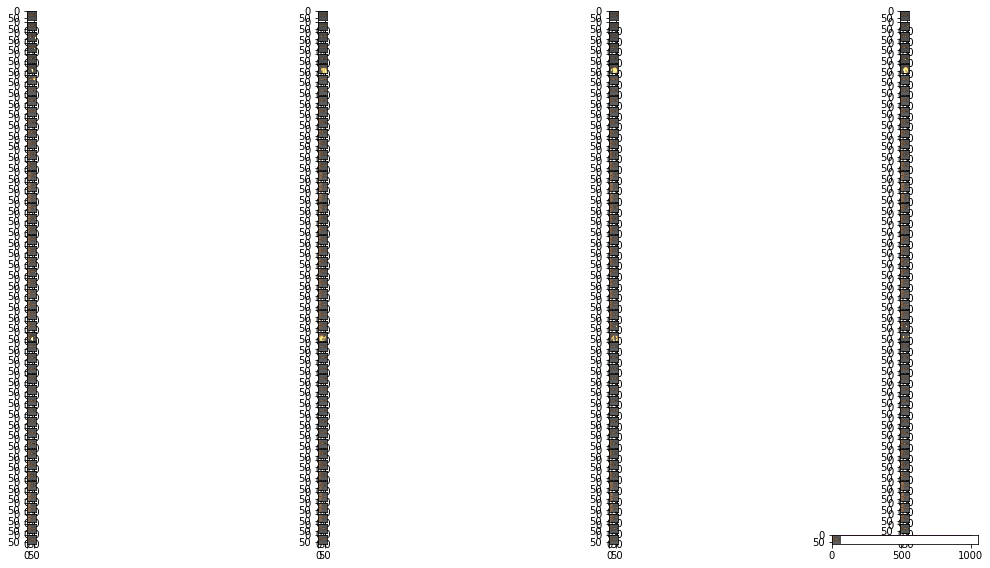

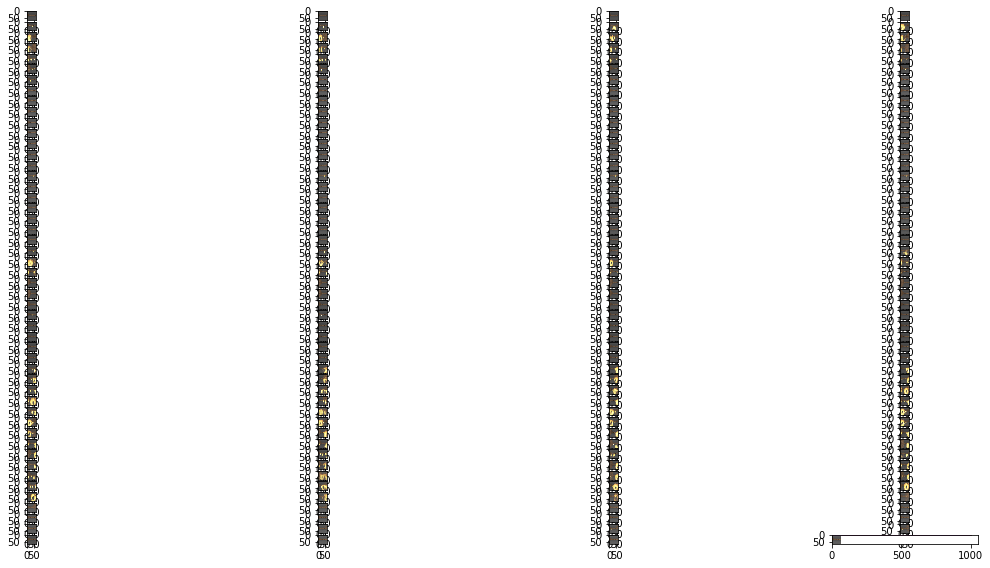

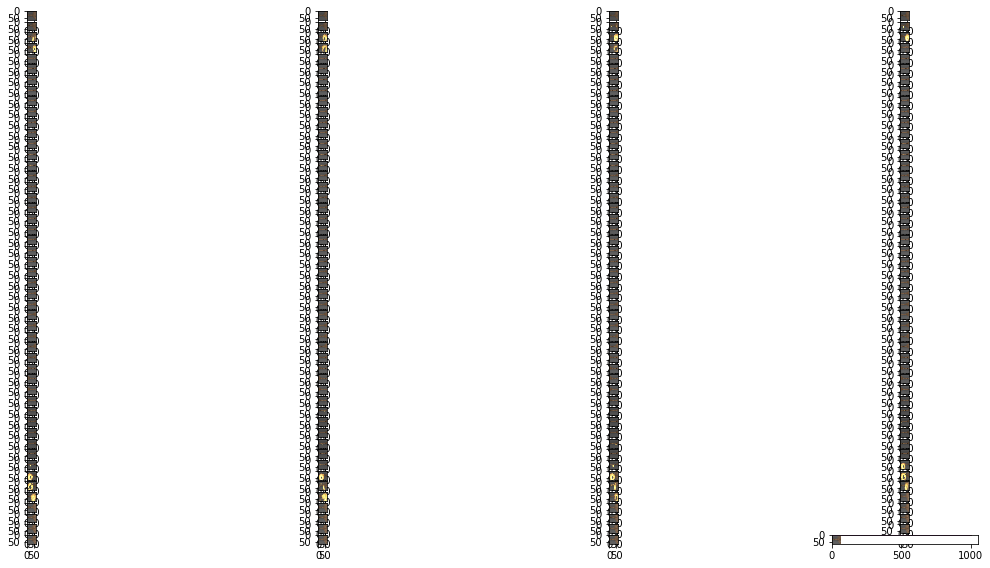

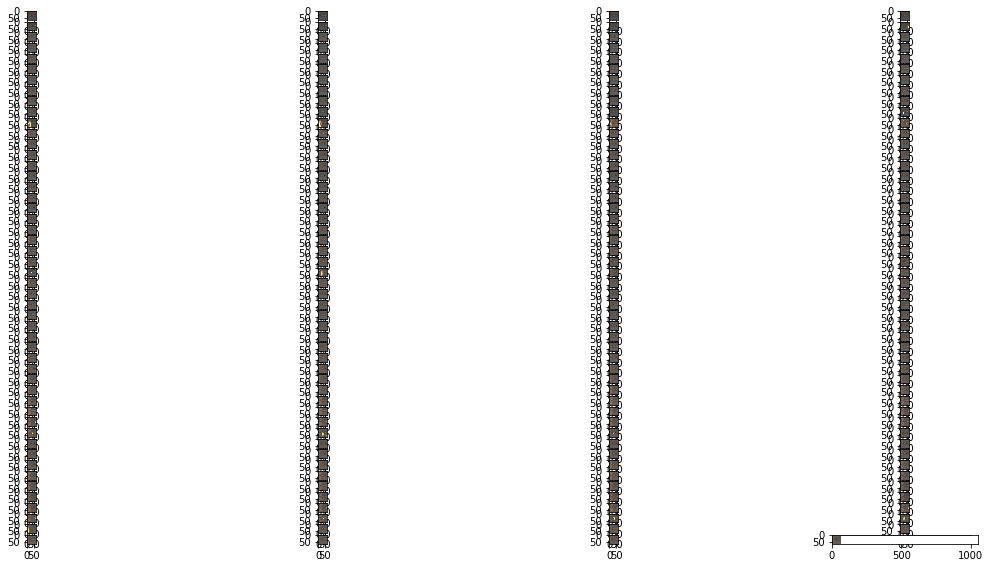

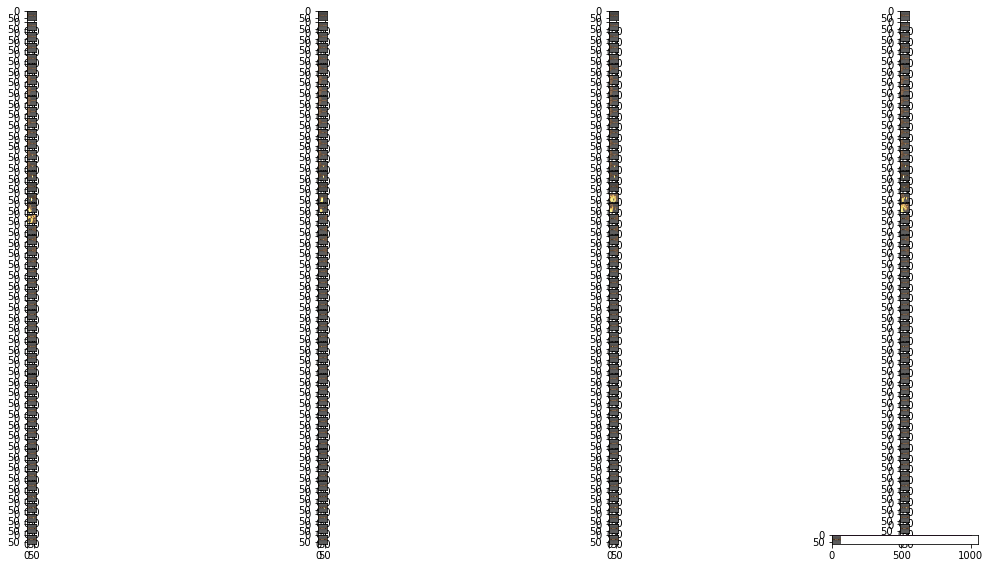

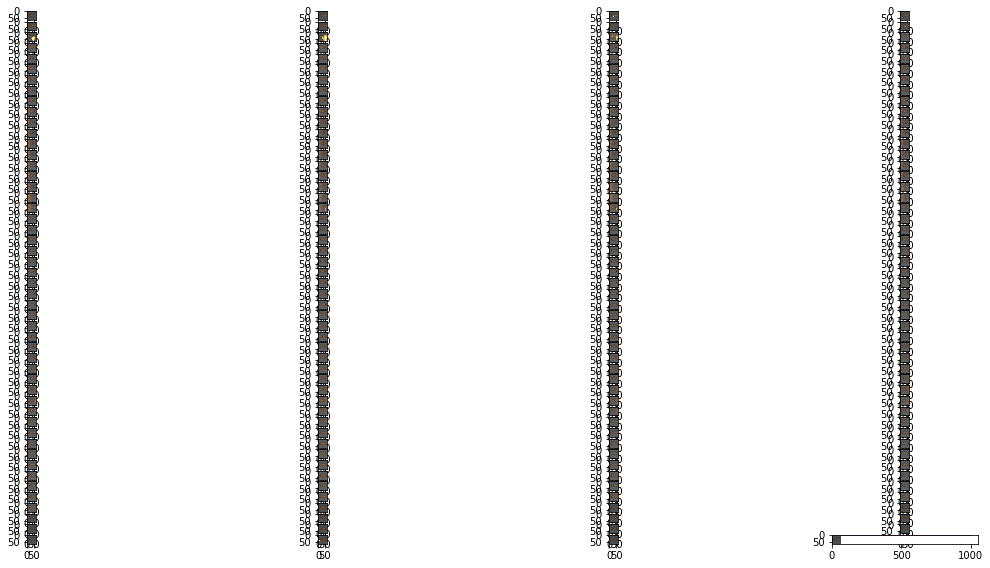

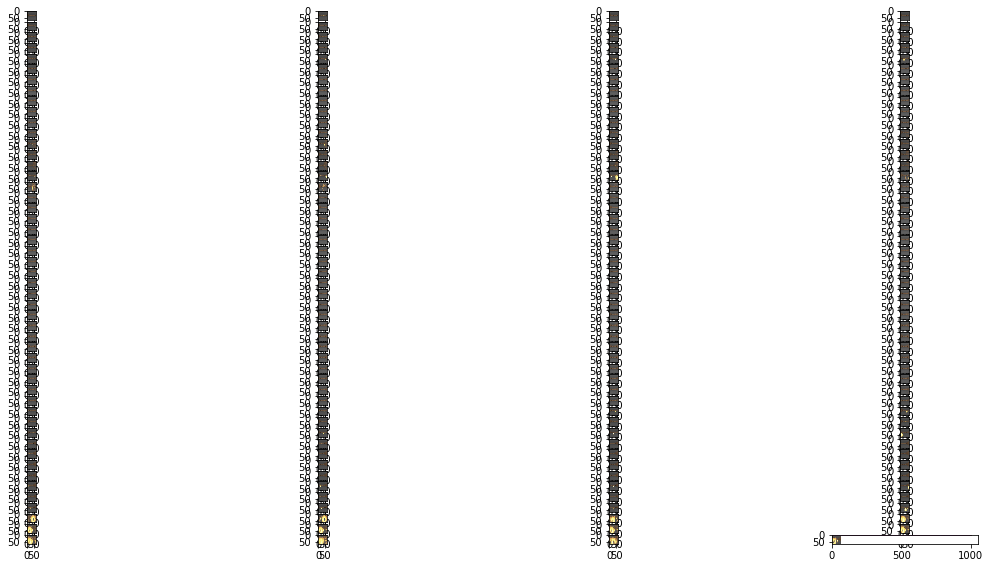

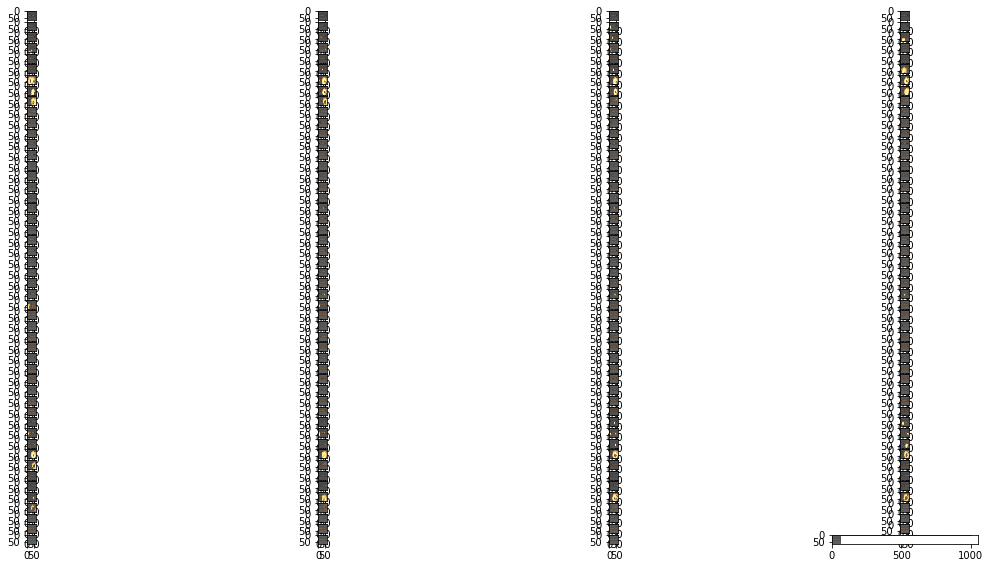

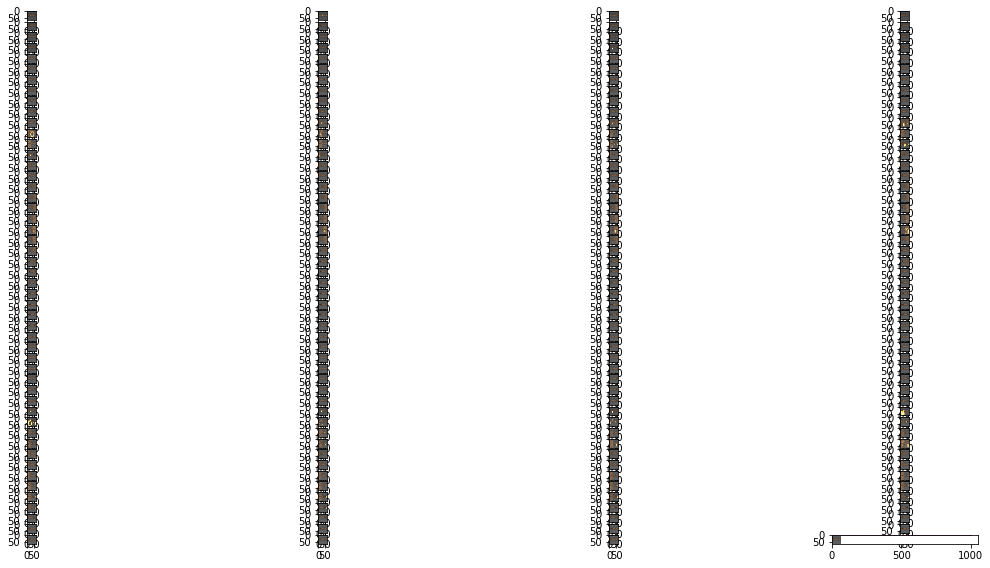

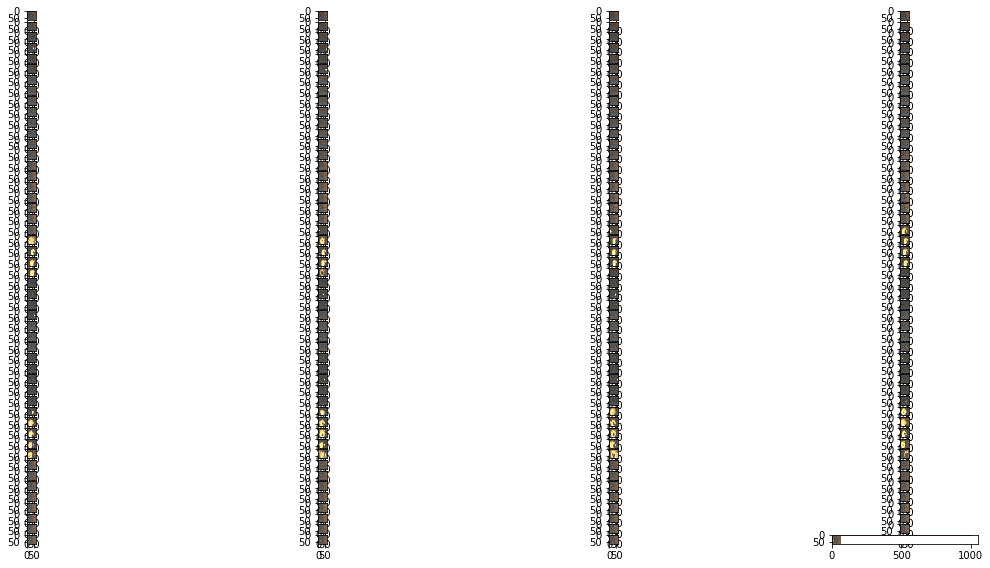

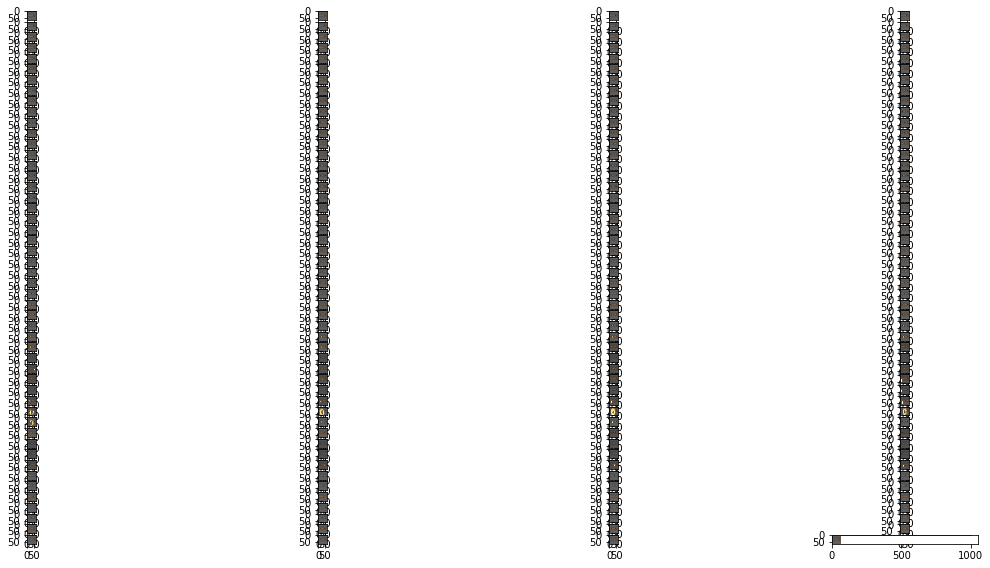

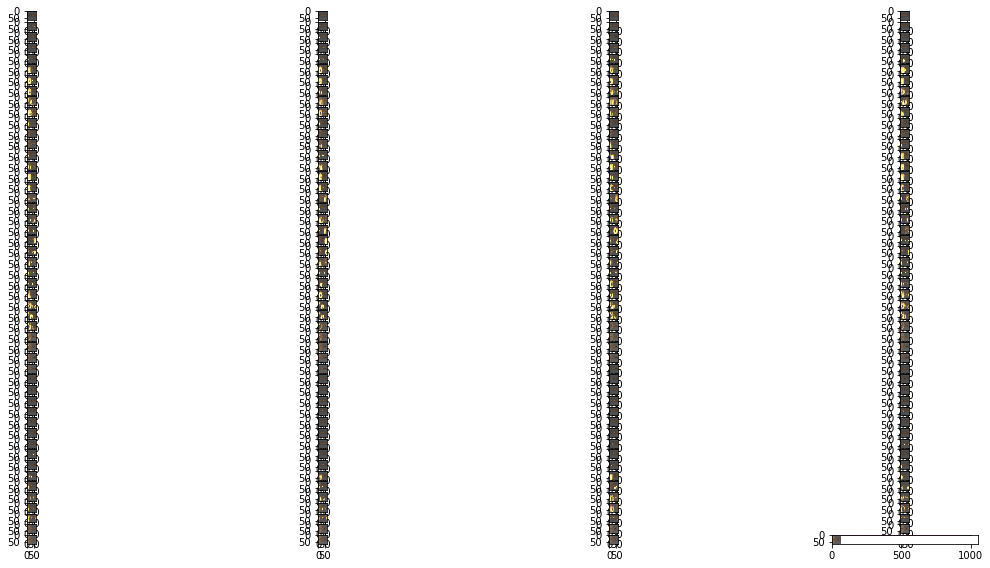

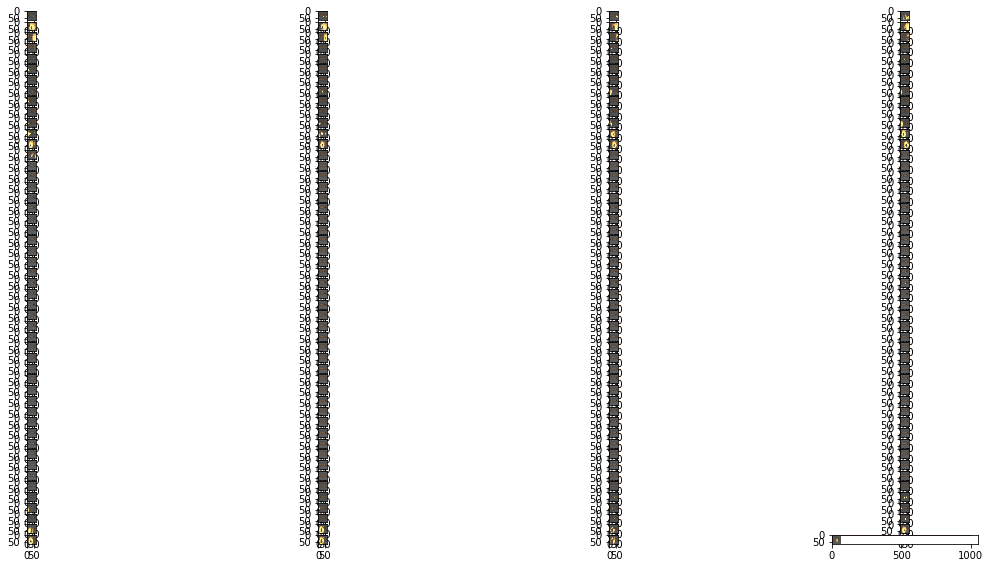

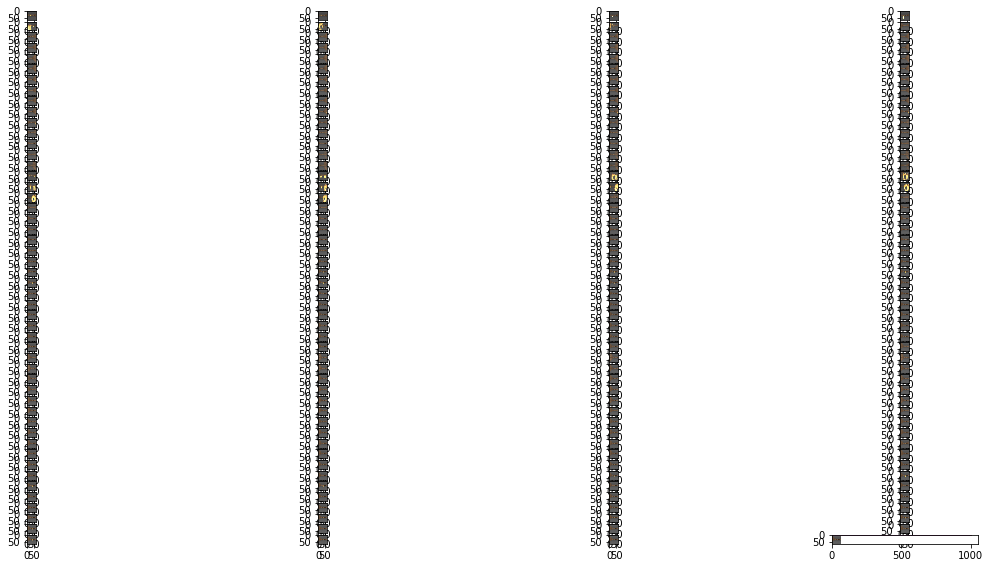

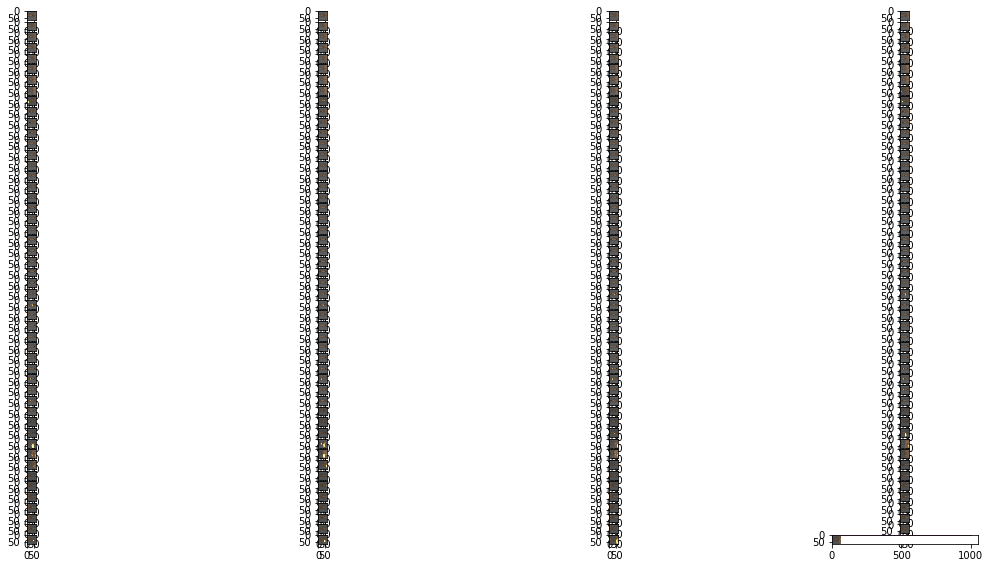

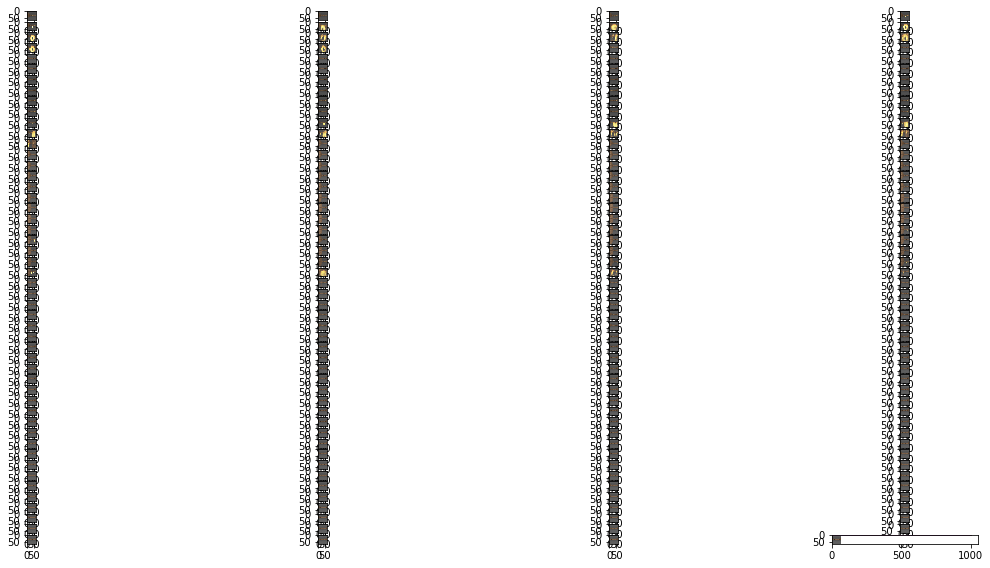

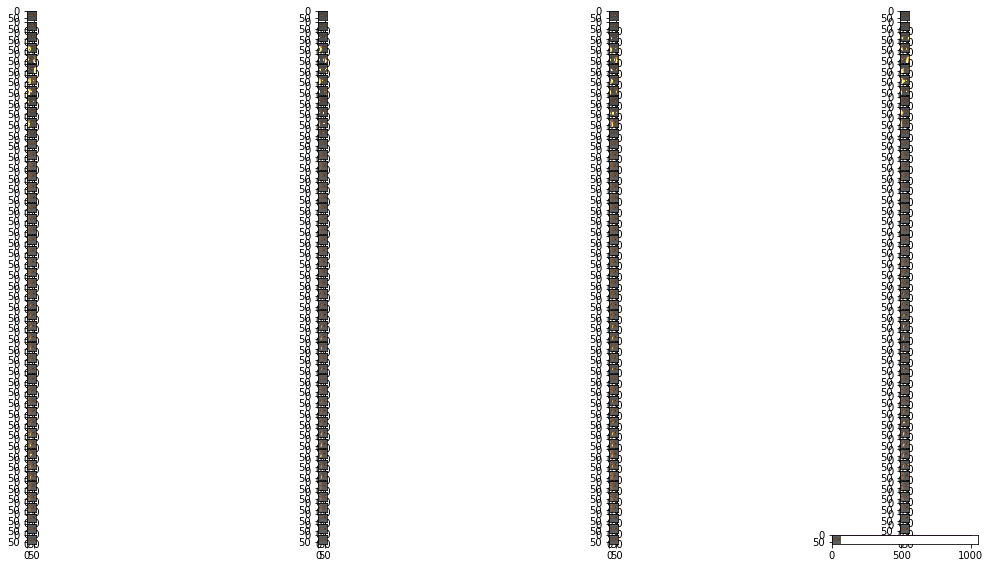

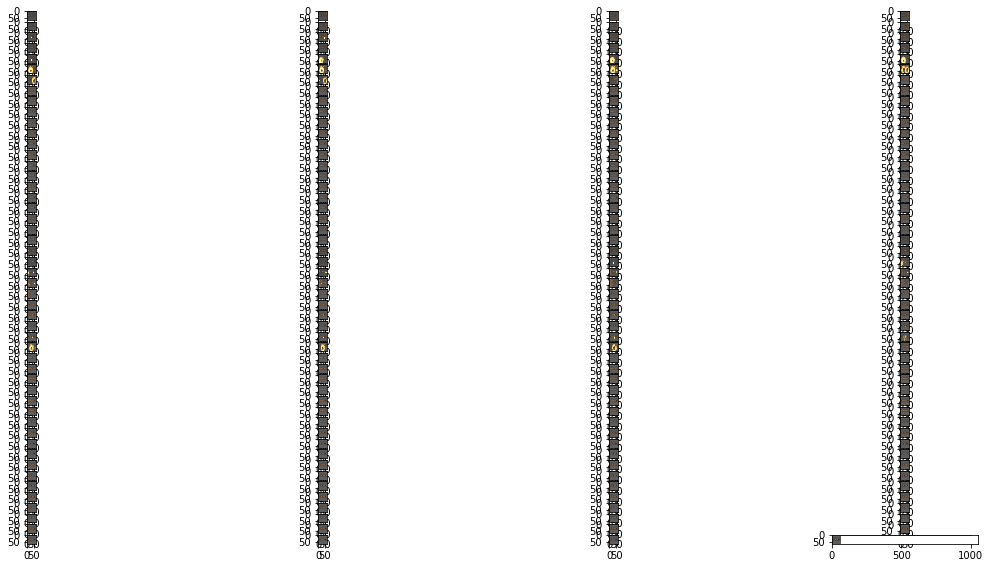

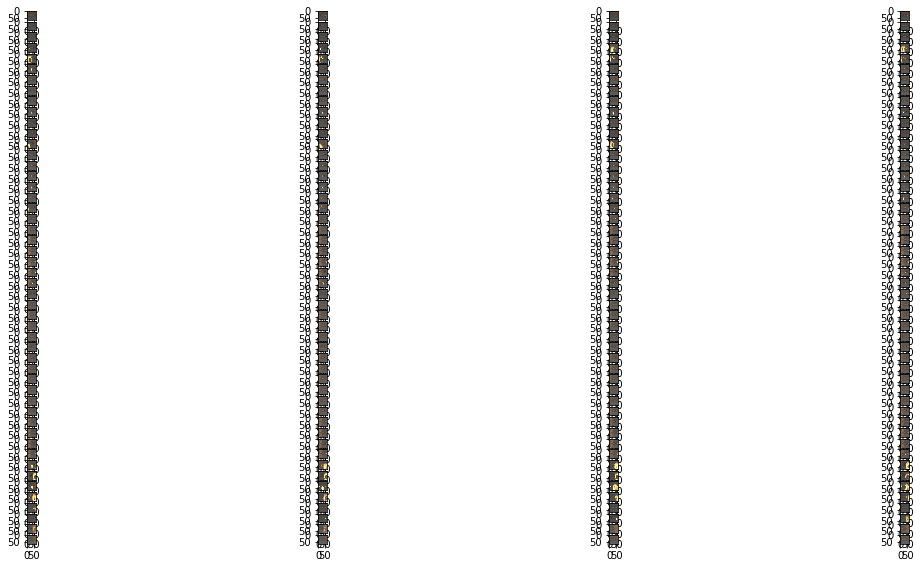

In [14]:
import pandas as pd
event_to_mixture_summary = []
main_mixture_summary = []
summary_num_events_handled_by_each_mixture = []
STATISTICAL_REPETITIONS = 10
SEQUENCE_LENGTH = 1000
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        if num_mixtures!=5:
            continue #Sticking to 5 now.
        for model in rnn_model_list:
            event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(model, 1000)
            event_to_mixture_summary.append(event_to_mixture)
            main_mixture_summary.append(main_mixture)
            num_events_handled_by_each_mixture={}
            for mixture, events in mixture_to_event.items():
                num_events_handled_by_each_mixture[mixture] = len(events)
            summary_num_events_handled_by_each_mixture.append(num_events_handled_by_each_mixture)
    
events_dataframe = pd.DataFrame(event_to_mixture_summary)
mixture_summary_dataframe = pd.DataFrame(main_mixture_summary)
summary_num_events_dataframe = pd.DataFrame(summary_num_events_handled_by_each_mixture)

In [15]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    event_proportion_in_main=np.divide(event_in_main_mixture,np.add(event_in_other_mixtures,event_in_main_mixture))
    total_proportion_in_main=np.divide(total_num_main_mixture,total_num_all_mixtures)
                                
                                
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    
    
    #Measures difference between: (Event modelled my MainMixture/TotalNumEvent) and
    #(total modelled by MainMixture/ totalAllEvents)
    main_model_proportion_dict_event = {"event_name" : event_name, "proportion" : event_proportion_in_main, "event_only" :"Yes"}
    main_model_proportion_dict_total = {"event_name": event_name, "proportion": total_proportion_in_main, "event_only" : "No"}
    
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    
    main_model_proportion_frame = pd.DataFrame(main_model_proportion_dict_event)
    main_model_proportion_frame_b = pd.DataFrame(main_model_proportion_dict_total)
    main_model_proportion_frame = main_model_proportion_frame.append(main_model_proportion_frame_b)
    return return_frame, main_model_proportion_frame

In [18]:
from scipy.stats import mannwhitneyu

def significance_test(dataframe, event_name):
    #Does two tests of significance:
    #1. Are there significantly more occurences of event event_name
    #in the "main" mixture than in the others?
    #2. Are there significant differences between the number of total
    #events in the main mixture than others?
    #The latter controls for situations where all/very many events
    #end up being modelled by 1 mixture.
    main_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'Yes']
    other_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'No']
    event_main = main_mixture_data[event_name]
    total_main = main_mixture_data['total']
    event_other = other_mixture_data[event_name]
    total_other = other_mixture_data['total']
    
    print("Significant differences between number of the event in main vs all other mixtures")
    print("Significant differences between number of ANY event in main vs all other mixtures")

    print(mannwhitneyu(event_main, event_other, alternative='two-sided'))
    print(mannwhitneyu(total_main, total_other, alternative='two-sided'))

In [19]:
def significance_test_proportions_frame(proportions_frame):
    #Test if the "main mixture" is significantly more common for the
    #event∕situation than it is overall.
    event_only_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'Yes']
    total_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'No']
        
    print("Significant differences between proportion of the mixture in event vs in all frames")
    print(mannwhitneyu(event_only_proportion['proportion'].tolist(), total_proportion['proportion'].tolist(), alternative='two-sided'))

## Plotting tendency to model different events in one specific mixture

Significance fb appear:
Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1510.0, pvalue=0.07362174209541744)
Significance fb disappear:
Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1528.0, pvalue=0.055742835218587486)
Significance monster appear:
Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=983.0, pvalue=0.06617993344569598)
Significance monster disappear:
Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=952.0, pvalue=0.040275574503942105)
           event_name  proportion event_only
0     fireball_appear    0.269231        Yes
1     fireball_appear    0.646154        Yes
2     fireball_appear    0.379630        Yes
3     fireball_appear    0.581395        Yes
4     fireball_appear    0.353846        Yes
5     fireball_appear 

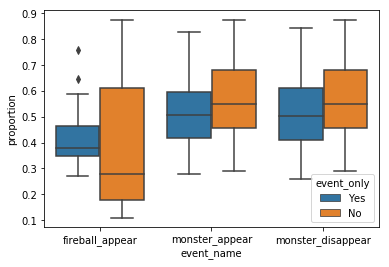

In [21]:
import seaborn as sns
#print(significance_test_proportions_frame(proportions_frame))
_, fireball_appear_proportions = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball_appear", main_mixture_summary, summary_num_events_dataframe)
_, fireball_disappear_proportions = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball_disappear", main_mixture_summary, summary_num_events_dataframe)
_, monster_appear_proportions = count_events_in_main_vs_other_mixtures(events_dataframe, "monster_appear", main_mixture_summary, summary_num_events_dataframe)
_, monster_disappear_proportions = count_events_in_main_vs_other_mixtures(events_dataframe, "monster_disappear", main_mixture_summary, summary_num_events_dataframe)

print("Significance fb appear:")
significance_test_proportions_frame(fireball_appear_proportions)
print("Significance fb disappear:")
significance_test_proportions_frame(fireball_disappear_proportions)
print("Significance monster appear:")
significance_test_proportions_frame(monster_appear_proportions)
print("Significance monster disappear:")
significance_test_proportions_frame(monster_disappear_proportions)

#No fireballs disappear, because that is deterministic.
all_proportions = [fireball_appear_proportions,monster_appear_proportions,monster_disappear_proportions] #
all_proportions = pd.concat(all_proportions)
print(all_proportions)

sns.boxplot(x="event_name", y="proportion", hue="event_only", data=all_proportions)
plt.savefig("test.eps")
#sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(explosion_proportions_frame, id_vars=['event_only', 'variable']))

## Fireballs Appearing

In [21]:
#print(events_dataframe)
fb_appear_data, proportion_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball_appear", main_mixture_summary, summary_num_events_dataframe)
significance_test(fb_appear_data, "fireball_appear")
#print(fb_appear_data)
pd.melt(fb_appear_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=1833.5, pvalue=0.8624273123311058)
MannwhitneyuResult(statistic=2791.0, pvalue=2.0046797479993075e-07)


main_mixture         variable  value
0            Yes  fireball_appear    100
1            Yes  fireball_appear     50
2            Yes  fireball_appear     41
3            Yes  fireball_appear     72
4            Yes  fireball_appear     34
5            Yes  fireball_appear     68
6            Yes  fireball_appear     78
7            Yes  fireball_appear     39
8            Yes  fireball_appear    126
9            Yes  fireball_appear     51
10           Yes  fireball_appear     53
11           Yes  fireball_appear     47
12           Yes  fireball_appear     50
13           Yes  fireball_appear     50
14           Yes  fireball_appear     64
15           Yes  fireball_appear     44
16           Yes  fireball_appear     41
17           Yes  fireball_appear     44
18           Yes  fireball_appear     35
19           Yes  fireball_appear     93
20           Yes  fireball_appear     48
21           Yes  fireball_appear     46
22           Yes  fireball_appear     49
23           Yes  fireball_appear     35
24           Yes  fireball_appear     84
25           Yes  fireball_appear     45
26           Yes  fireball_appear     65
27           Yes  fireball_appear     35
28           Yes  fireball_appear     40
29           Yes  fireball_appear     58
..           ...              ...    ...
210           No            total    445
211           No            total    205
212           No            total    803
213           No            total    507
214           No            total    106
215           No            total    385
216           No            total    256
217           No            total    404
218           No            total    533
219           No            total    615
220           No            total    358
221           No            total    209
222           No            total    358
223           No            total    465
224           No            total    361
225           No            total    476
226           No            total    421
227           No            total    395
228           No            total    418
229           No            total    154
230           No            total    619
231           No            total    345
232           No            total    354
233           No            total    404
234           No            total    301
235           No            total    406
236           No            total    749
237           No            total    722
238           No            total    407
239           No            total    321

[240 rows x 3 columns]

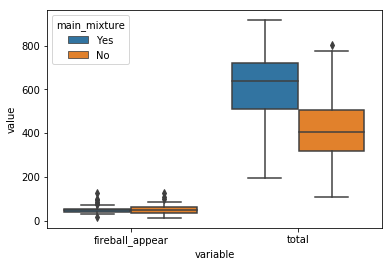

In [22]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fb_appear_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1183.5, pvalue=0.0012241629774571133)
None


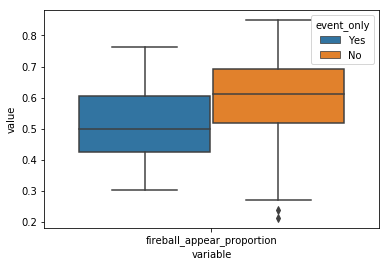

In [27]:
#Compares the proportion of the event (Fireball Appear) in the main mixture, to the total,
#to the proportion of ALL events in the main mixture vs total. If the former is significantly larger than the 
#latter, that should indicate an effect?
#print(proportion_frame)
print(significance_test_proportions_frame(proportion_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportion_frame, id_vars=['event_only']))

## Fireballs Disappearing

In [29]:
fb_disappear_data, proportion_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball_disappear", main_mixture_summary, summary_num_events_dataframe)
significance_test(fb_disappear_data, "fireball_disappear")
pd.melt(fb_disappear_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=1304.5, pvalue=0.00935679622373545)
MannwhitneyuResult(statistic=2791.0, pvalue=2.0046797479993075e-07)


main_mixture            variable  value
0            Yes  fireball_disappear     91
1            Yes  fireball_disappear     47
2            Yes  fireball_disappear     37
3            Yes  fireball_disappear     72
4            Yes  fireball_disappear     41
5            Yes  fireball_disappear     67
6            Yes  fireball_disappear     74
7            Yes  fireball_disappear     36
8            Yes  fireball_disappear    108
9            Yes  fireball_disappear     40
10           Yes  fireball_disappear     39
11           Yes  fireball_disappear     38
12           Yes  fireball_disappear     68
13           Yes  fireball_disappear     52
14           Yes  fireball_disappear     60
15           Yes  fireball_disappear     33
16           Yes  fireball_disappear     41
17           Yes  fireball_disappear     45
18           Yes  fireball_disappear     31
19           Yes  fireball_disappear     84
20           Yes  fireball_disappear     45
21           Yes  fireball_disappear     41
22           Yes  fireball_disappear     41
23           Yes  fireball_disappear     26
24           Yes  fireball_disappear     69
25           Yes  fireball_disappear     41
26           Yes  fireball_disappear     57
27           Yes  fireball_disappear     48
28           Yes  fireball_disappear     35
29           Yes  fireball_disappear     61
..           ...                 ...    ...
210           No               total    445
211           No               total    205
212           No               total    803
213           No               total    507
214           No               total    106
215           No               total    385
216           No               total    256
217           No               total    404
218           No               total    533
219           No               total    615
220           No               total    358
221           No               total    209
222           No               total    358
223           No               total    465
224           No               total    361
225           No               total    476
226           No               total    421
227           No               total    395
228           No               total    418
229           No               total    154
230           No               total    619
231           No               total    345
232           No               total    354
233           No               total    404
234           No               total    301
235           No               total    406
236           No               total    749
237           No               total    722
238           No               total    407
239           No               total    321

[240 rows x 3 columns]

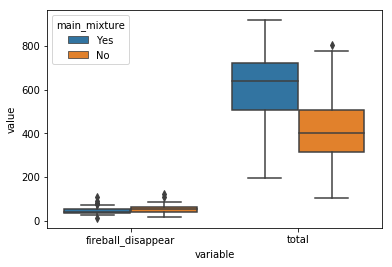

In [30]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fb_disappear_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=866.0, pvalue=9.602568975123122e-07)
None


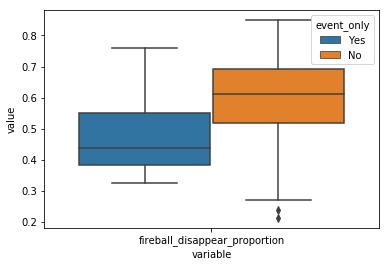

In [31]:
#Compares the proportion of the event (Fireball Appear) in the main mixture, to the total,
#to the proportion of ALL events in the main mixture vs total. If the former is significantly larger than the 
#latter, that should indicate an effect?
#print(proportion_frame)
print(significance_test_proportions_frame(proportion_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportion_frame, id_vars=['event_only']))

## Monster Appear

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=3111.5, pvalue=5.9298840796832584e-12)
MannwhitneyuResult(statistic=3132.5, pvalue=2.7226389907805442e-12)


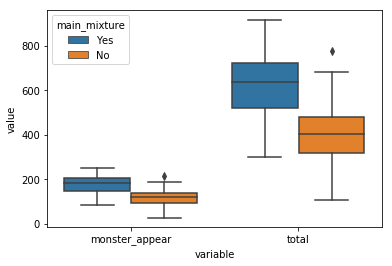

In [32]:
monster_appear_data, proportion_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "monster_appear", main_mixture_summary, summary_num_events_dataframe)
significance_test(monster_appear_data, "monster_appear")
pd.melt(monster_appear_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(monster_appear_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1775.0, pvalue=0.8976800664015162)
None


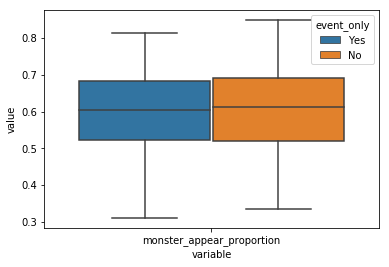

In [33]:
#Compares the proportion of the event (Fireball Appear) in the main mixture, to the total,
#to the proportion of ALL events in the main mixture vs total. If the former is significantly larger than the 
#latter, that should indicate an effect?
#print(proportion_frame)
print(significance_test_proportions_frame(proportion_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportion_frame, id_vars=['event_only']))

## Monster Disappear

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=3140.0, pvalue=2.0480245021732185e-12)
MannwhitneyuResult(statistic=3132.5, pvalue=2.7226389907805442e-12)


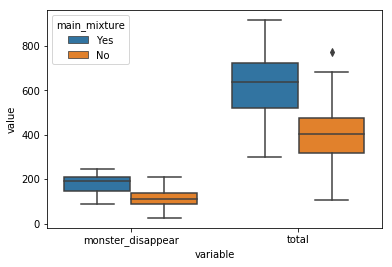

In [35]:
monster_disappear_data, proportion_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "monster_disappear", main_mixture_summary, summary_num_events_dataframe)
significance_test(monster_disappear_data, "monster_disappear")
pd.melt(monster_disappear_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(monster_disappear_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1826.5, pvalue=0.8914536260497984)
None


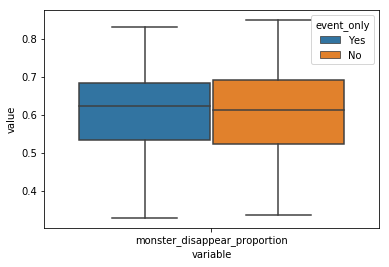

In [36]:
#Compares the proportion of the event (Fireball Appear) in the main mixture, to the total,
#to the proportion of ALL events in the main mixture vs total. If the former is significantly larger than the 
#latter, that should indicate an effect?
#print(proportion_frame)
print(significance_test_proportions_frame(proportion_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportion_frame, id_vars=['event_only']))